#Credit Card Users Churn Prediction : Problem Statement

###Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

###Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier
)

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix
)

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Import Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
churn = pd.read_csv('/content/drive/MyDrive/Python Course/BankChurners.csv')

In [6]:
data = churn.copy()

In [7]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

- data imported correctly

#Data Overview

In [8]:
data.shape

(10127, 21)

- There are 10127 rows and 21 columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are 6 object type columns and 15 numeric type columns
- Education_Level and Marital_Status both have a good amount of missing values

###Fixing Data types object to category

In [10]:
data['Gender'] = data['Gender'].astype('category')
data['Education_Level'] = data['Education_Level'].astype('category')
data['Marital_Status'] = data['Marital_Status'].astype('category')
data['Income_Category'] = data['Income_Category'].astype('category')
data['Card_Category'] = data['Card_Category'].astype('category')

In [11]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- Here we can see that there are 1,519 entries missing for Education Level
- Marital status has 749 missing values
- We definitely don't want to drop this many records from our data so we will need to impute these values before building our models.

In [12]:
data.duplicated().sum()

0

- There are no duplicate values

In [13]:
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

- Mean age of customers is 46 with a max age of 73
- Number of dependents ranges from 0 to 5 with 2 being the average.
- The average months on books is about 36 months or 3 years for customers.
- Months inactive over the last 12 months and contacts between the bank and customers both show an average of a little over 2 with a max of 6. These numbers being similar could mean a relationship between customer contacts and being inactive, but more analysis will be needed to determine if these have any correlation.
- Avg. credit limit for customers is a little over 8,600 while the is just over 34,500. While this number is entirely possible it will most likely be an extreme outlier as it is over 4x the avg. and over 3x the 75th percentile. We will need to take a further look at this.
- Revolving balance is $1,162 with max being 2,517 and min. being 0.
- Avg. open to buy refers to available balance and as expected this lines up with what we saw in credit limit and revolving balance together.
- Total transaction amount for the last 12 months is about 4,400 on avg. with a a max of nearly 18,500.
- The total transaction count shows an avg. of about 65 transaction for the last 12 months with a max of 139 transactions. There is almost certainly a positive correlation between transaction amount and count, but just how strong of a correlation there is will need further analysiss.
- The ratios of total amount change and total count change from Q4 to Q1 line up pretty close with each other which we would expect.
- Avg. utilization ratio is about 27.5% while max is 99.9% so some customers are using nearly their full credit limit but on avg. customers only spent a little over 1/4 of their available credit.

In [14]:
data['CLIENTNUM'].nunique()

10127

- CLIENTNUM is just a identification number for each customer and so we will drop it as it won't be neccesary for our model.

In [15]:
data.drop('CLIENTNUM', axis=1, inplace=True)

In [16]:
data.head(2)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105

- 'CLIENTNUM' column has been dropped.

###Let's take a look at our categorical columns.

In [17]:
# create a list for categorical columns
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [18]:
for column in cat_cols:
  print(data[column].value_counts())
  print('-'*50)

F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------


- Gender has a fairly even split but there are more Female customers than Male.
- For Education Level it looks like most customers are graduates while current college students and higher level college comprise less of the total customers. It will be interesting to see if Education Level plays a role in customer attrition.
- Majority of customers are married, but single customers also make up a decent portion of the customer base.
- On Income the majority of customers are making less than 40k a year. The rest of the customers seem to be pretty evenly distributed along the income spectrum until you get to 120k + where is drops by nearly half.
- Also on Income it appears there is a category named 'abc' this is clearly an error which means 1,112 customers do not have an actual income level. We don't want to drop this many customers so we will need to find a way to impute these values.
- Card Category shows that there are 4 different tiers to the credit cards, and most customers are on the lower tier Blue plan. Numbers drop sharply as the tiers increase with only 20 customers on the, highest level, Platinum plan.

###Let's replace the 'abc' in Income with the mode of < 40K as opposed to dropping these entries.

In [19]:
# Replacing 'abc' with 'Less than $40k'
data['Income_Category'] = data['Income_Category'].replace('abc', 'Less than $40K')

In [20]:
data['Income_Category'].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

- Income_Category has been Successfully updated replacing the 'abc' income level.

###Now we can impute the missing values for Education_Level and Marital_Status.

In [21]:
imputer = SimpleImputer(strategy='most_frequent')

impute_mode_cols = ['Education_Level', 'Marital_Status']

data[impute_mode_cols] = imputer.fit_transform(data[impute_mode_cols])

In [22]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- All missing values have now been imputed.

#Univariate Analysis

###First let's look at the numerical columns

In [23]:
# function to plot a boxplot and histogram 
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure
    kde: whether to show the density curve (set to False)
    bins: bins for histogram (set to None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize
    ) 
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='orange' 
        )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )

###Customer Age

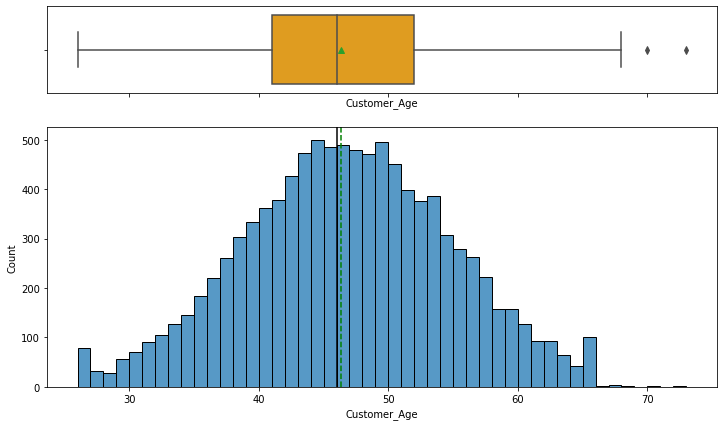

In [24]:
hist_box(data, 'Customer_Age')

- Customer age has a fairly normal distribution with just 2 outliers to the right at ages 70 and 73 which are perfectly valid data points so no treatment is needed.

###Dependent Count

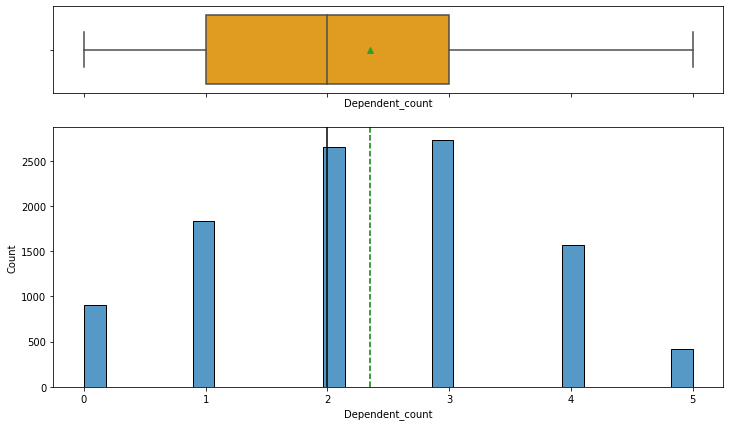

In [25]:
hist_box(data, 'Dependent_count')

- Dependent count is from 0 - 5, with 2 or 3 dependents being the most common. 3 is slightly higher but the mean and median are both closer to 2.
- There are no outliers.

###Months on Book

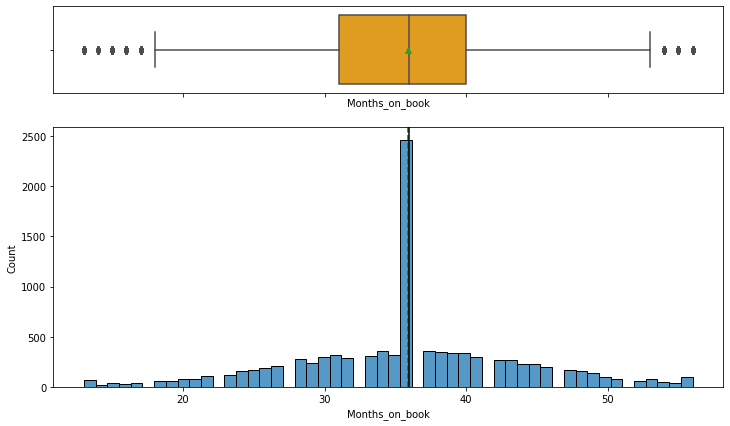

In [26]:
hist_box(data, 'Months_on_book')

- Months on book has a slight left skew but still a fairly normal distribution. It really peaks with a large majority of customers being on books for 36-38 months or just over 3 years.

- There are a few outliers on both ends of the spectrum but they are valid data points and are not cause for any outlier treatment.

###Total Relationship Count

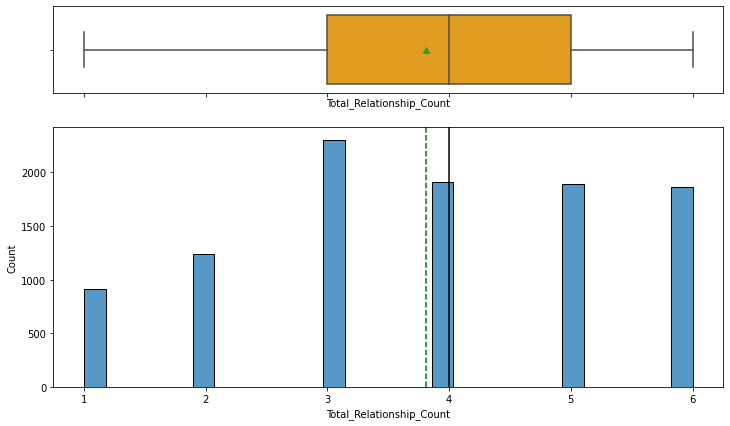

In [27]:
hist_box(data, 'Total_Relationship_Count')

- Total relationship count is the number of bank products held by the customer ranging from 1 to 6. The majority of customers own 3 or more bank products. 3 is the most common number to own amongst customers but 4, 5, 6 are fairly close as well causing the mean and median to sit at around 4.
- There is some left skewness, but no outliers.

###Months Inactive (last 12 mo.)

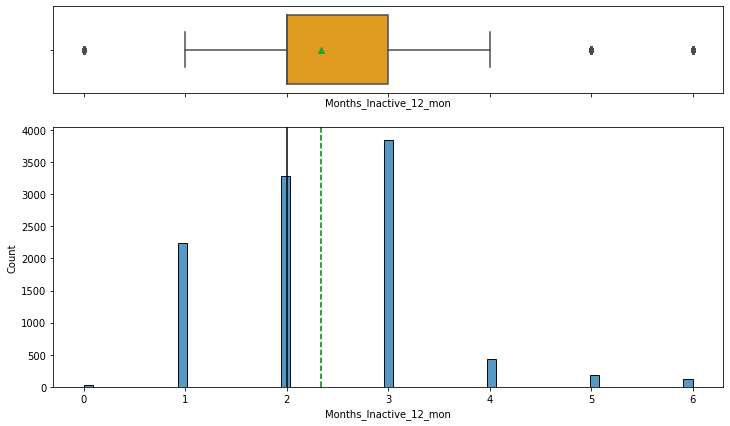

In [28]:
hist_box(data, 'Months_Inactive_12_mon')

- For months inactive over the last 12 month period it looks like most customers have only been inactive 1-3 months while a small number have been inactive in the 4-6 month range but no customers have been inactive for longer than 6 monts during the last 12 months.
- There are a few outliers on both ends, which I'm actually surprised to see that 0 inactive months was an outlier. Out of over 10,000 customers I would have guessed more that that would be active on a monthly basis throughout the past 12 months.

###Contact Count (last 12 mo.)

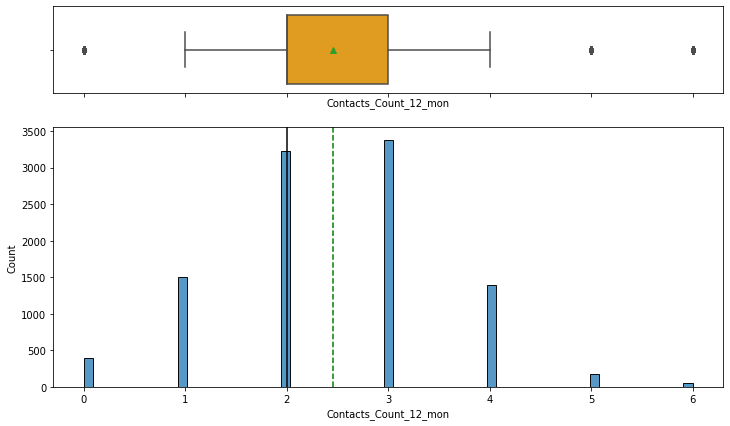

In [29]:
hist_box(data, 'Contacts_Count_12_mon')

- Contact count for the last 12 months has been between 0 and 6 contacts with 3 being the most followed very closely by 2.
- 0, 5, or 6 contacts are considered outliers.
- The plots for Contacts Count 12 mon. look very similiar to the plots for Inactive 12 mon. above. I believe we will end up seeing a correlation between the 2, perhaps the more you are contacted by the bank the less amount of time spent inactive, of course it will take further analysis to determine if this might hold true.

###Credit Limit

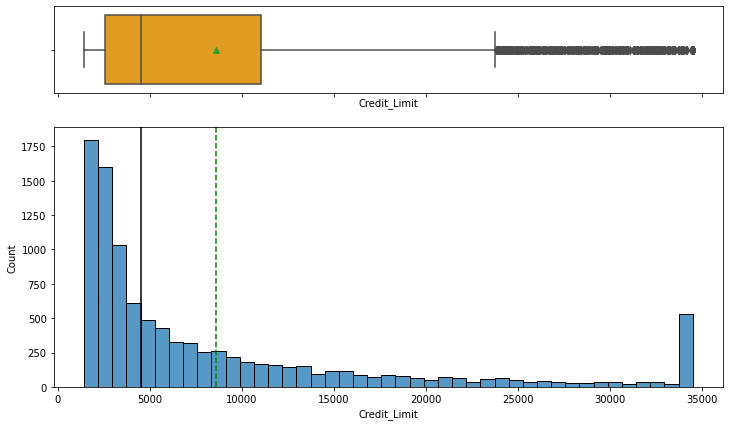

In [30]:
hist_box(data, 'Credit_Limit')

- Credit Limit is very right skewed with the majority of customers having less that a 5,000 credit limit, It drops off significantly past 5,000 and continues decreasing until a small spike at the highest end around 32,000 - 34,000 available credit limit.
- There are many outliers involved with credit limit but these are all valid data points so we will leave them.

###Avg. Open to Buy

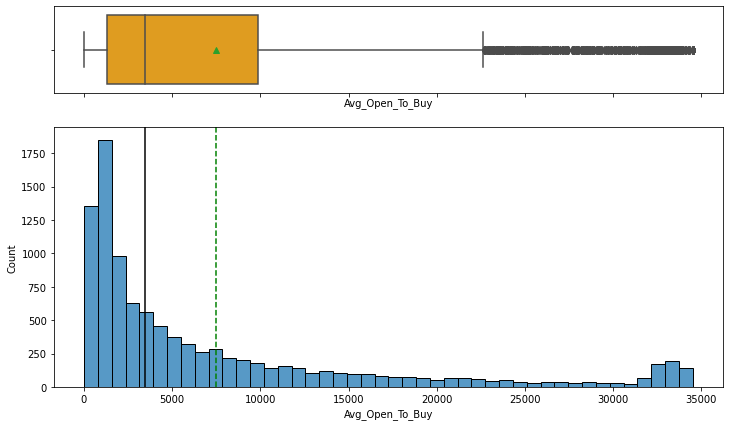

In [31]:
hist_box(data, 'Avg_Open_To_Buy')

- Avg. open to buy is very right skewed, showing a majority of customers at,  less than 5,000 in remaining purchasing power on their cards. 
- These plots line up very closely with the above plots on Credit Limit, I would not be surprised to see these having a somewhat strong correlation.
- Zero is the 2nd highest point with over 1,250 customers, this shows that as an average over the last 12 months these customers did not have any room to purchase more with their cards.

###Total Revolving Balance

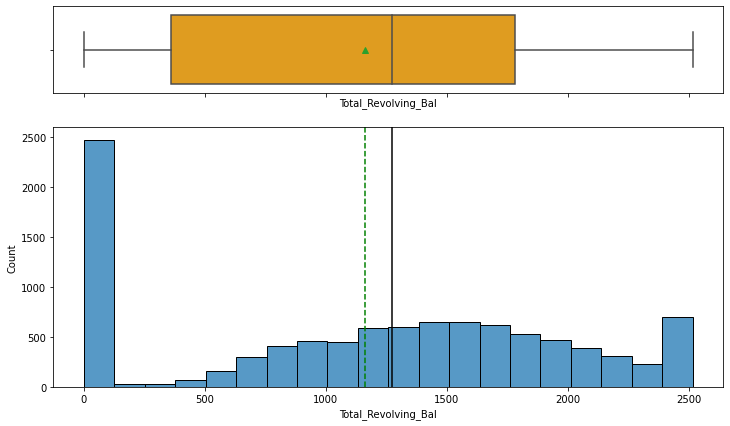

In [32]:
hist_box(data, 'Total_Revolving_Bal')

- Total Revolving Balance shows that the majority of customers do not keep a revolving balance at all.

###Total Transaction Amount

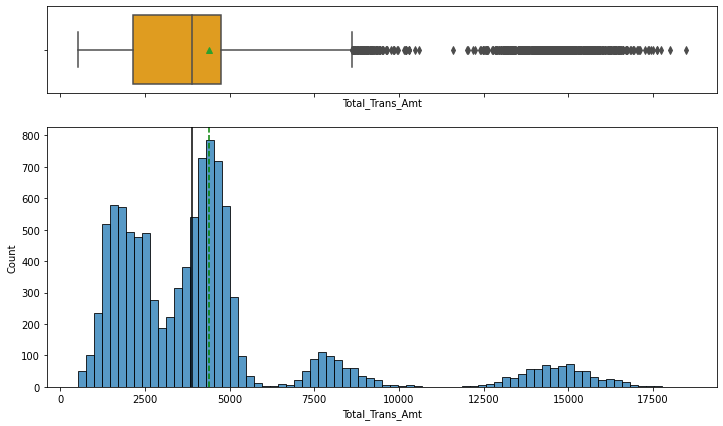

In [33]:
hist_box(data, 'Total_Trans_Amt')

- Total transaction amount is right skewed and for the last 12 months it seems to show a transaction range of 500 - 5,500 for the majority of customers.
- There are a bunch of outliers to the right showing large total purchase amounts for the last 12 months, but these outliers could correlate with the outliers seen in Credit Limit.

###Total Transaction Count

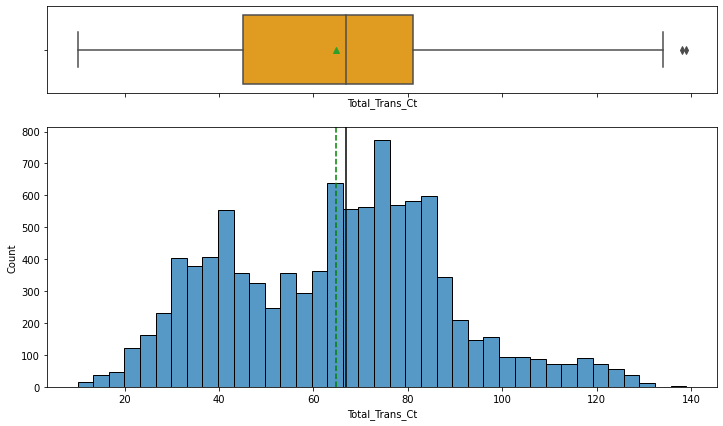

In [34]:
hist_box(data, 'Total_Trans_Ct')

- Total transaction count is a somewhat normal distribution with a bit of a right skew. It shows most people have made roughly 60 - 90 transactions over the last 12 months.
- There are 2 outliers to the right who have made nearly 140 transactions over the past 12 months.

###Avg. Utilization Ratio

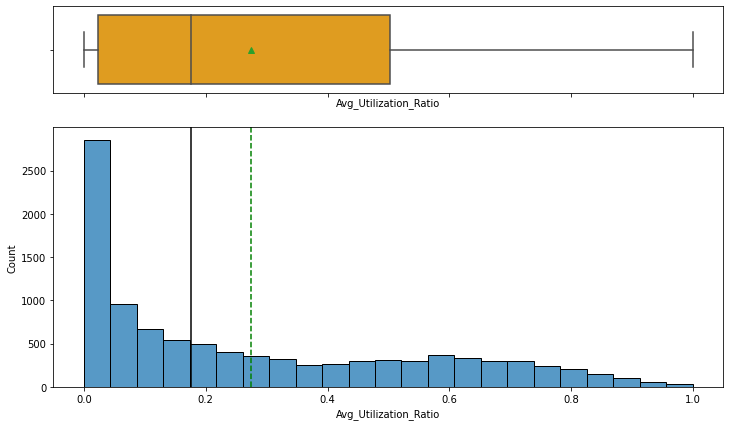

In [35]:
hist_box(data, 'Avg_Utilization_Ratio')

- Avg. Utilization ratio is very right skewed showing a large majority of customers with a ratio of 0 indicating that a lot of customers have not used any of their available credit, but if a lot are keeping their revolving balance at 0 then thier ratio of credit utilization would also be 0. 
- It will be interesting to see what kind of correlation we end up seeing between Utilization ratio and revolving balance.

###Total Amount Change Q4 to Q1

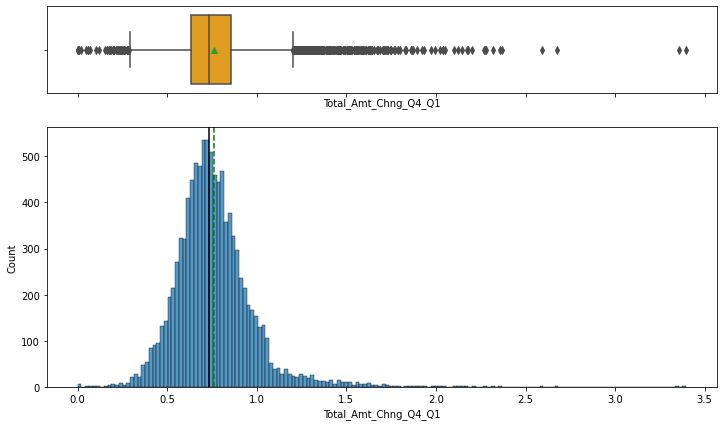

In [36]:
hist_box(data, 'Total_Amt_Chng_Q4_Q1')

- Total Amoutn Change Q4 to Q1 has a somewaht normal looking distribution but there is right skew to it as well as outliers on both ends.
- mean and median both lie between 0.5 and 1

###Total Count Change Q4 to Q1

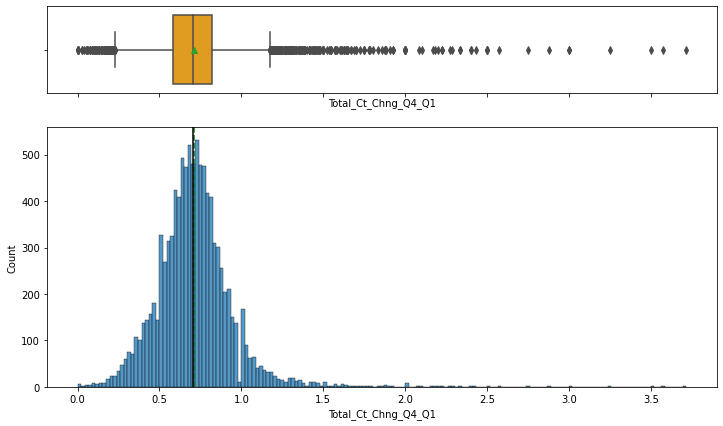

In [37]:
hist_box(data, 'Total_Ct_Chng_Q4_Q1')

- Total Count Change Q1 to Q4 looks very similar to the amount change Q4 to Q1 shown above.  It also has a fairly normal looking distribution with a right skew and outliers on both ends.
- It makes sense though as the change in transaction amounts one quarter to the next should correlate with the change in the count of transactions.

In [38]:
# function to create labeled barplots
def barplot_labeled(data, feature, perc=False, n=None):
    """
    Barplot with percentages

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (set to False)
    n: displays top n category levels (set to None to display all)
    """
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
      plt.figure(figsize=(count + 1, 5))
    else:
      plt.figure(figsize=(n+1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()

###Gender

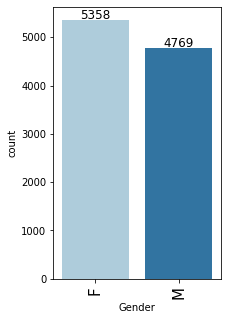

In [39]:
barplot_labeled(data, 'Gender')

- There are more Female customers than male, but overall not a significant difference.

###Education Level

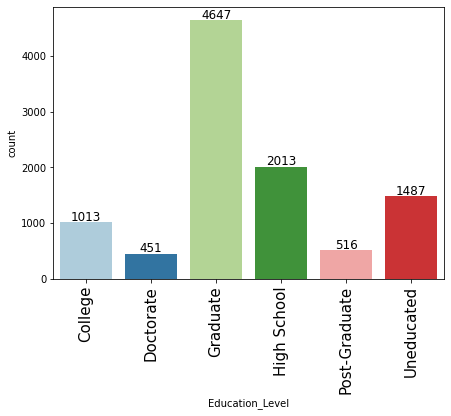

In [40]:
barplot_labeled(data, 'Education_Level')

- The majority of customers are Graduates, followed by high school, and then uneducated.
- Those who are currently college students, post-grad, or in doctorate programs make up a smaller portion.

###Marital Status

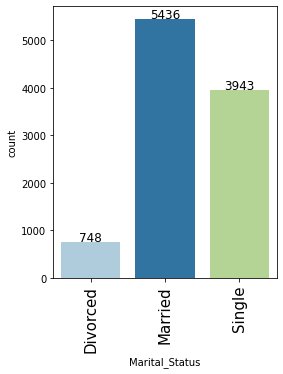

In [41]:
barplot_labeled(data, 'Marital_Status')

- Most customers are in the married category, followed by single, very few are in the divorced category comparatively.

###Income Category

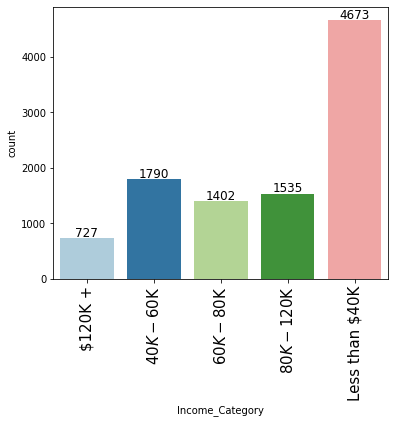

In [42]:
barplot_labeled(data, 'Income_Category')

- Majority of customers are making less than 40k, followed by the 40-60k category.
- Only a relatively smaller portion are making 120k or more. This category is where I would expect to see some of our extreme outliers on the credit limit scale.

###Card Category

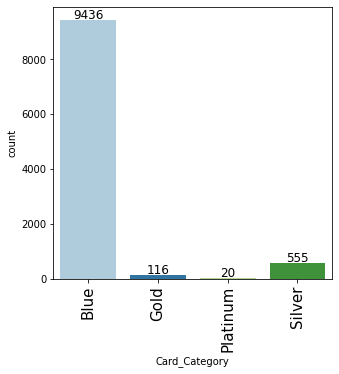

In [43]:
barplot_labeled(data, 'Card_Category')

- The overwhelming majority of customerss have blue level cards which is the base tier.
- Only 20 customers have the top tier platinum card. This is also where I suspect we will see the highest credit limit outliers.

###Attrition Flag

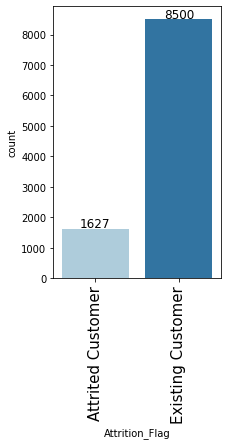

In [44]:
barplot_labeled(data, 'Attrition_Flag')

- Most customers are still existing customers.
- This large difference in our target variable shows that we have a data imbalance for which we will need to compensate when building our model in order to try and get better results.

#Bi-variate Analysis

Let's first take a look at the relationship between our repsonse variable and the numeric variables.

###Customer Age vs. Attrition

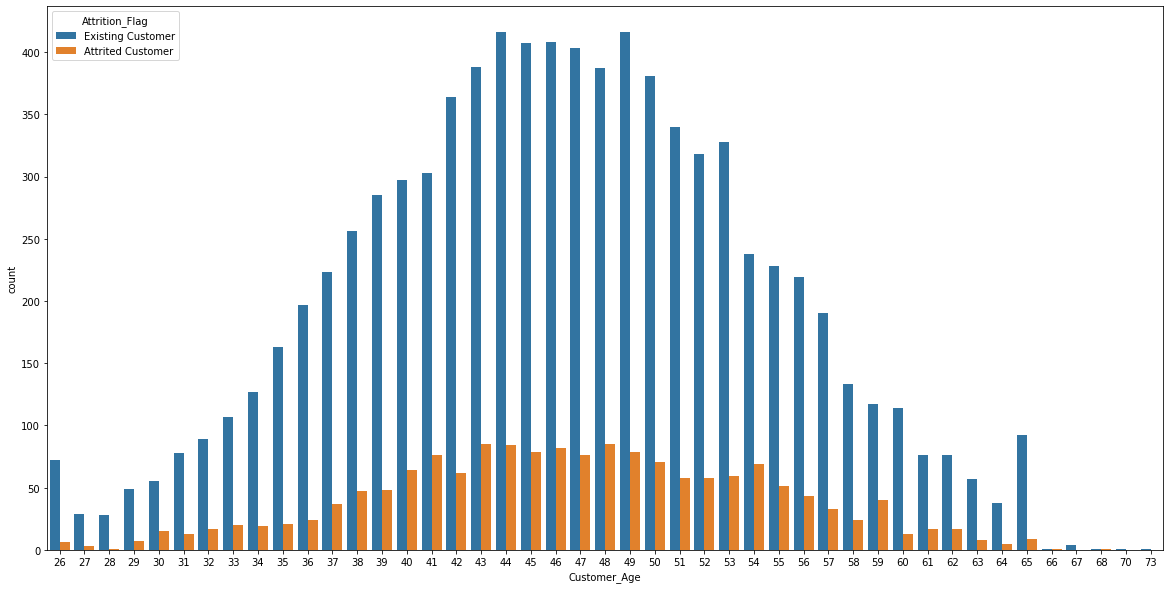

In [45]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Customer_Age', hue='Attrition_Flag')
plt.show()

- There is what looks like an almost normal distribution on the count plot.
- The highest number of customer attrition seems to be taking place between 41 to 54 with attrition decreasing in both directions outside of that range.
- Overall though there is some attrition at nearly every age level.

###Dependent Count vs. Attrition

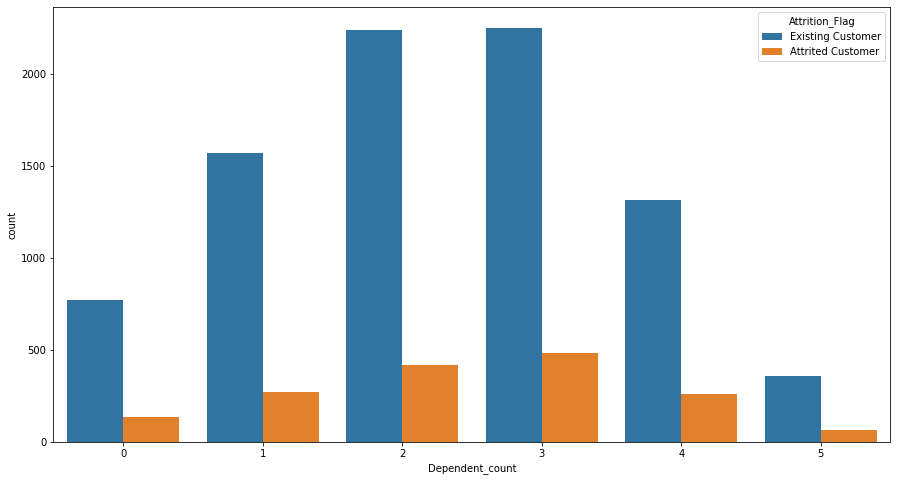

In [46]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='Dependent_count', hue='Attrition_Flag')
plt.show()

- we can also see a somewhat normal looking distribution on this count plot as well.
- Customers with 2 or 3 dependents are most common, and being the highest categories it is expected that they also have the highest attrition counts.

###Months on Book vs. Attrition

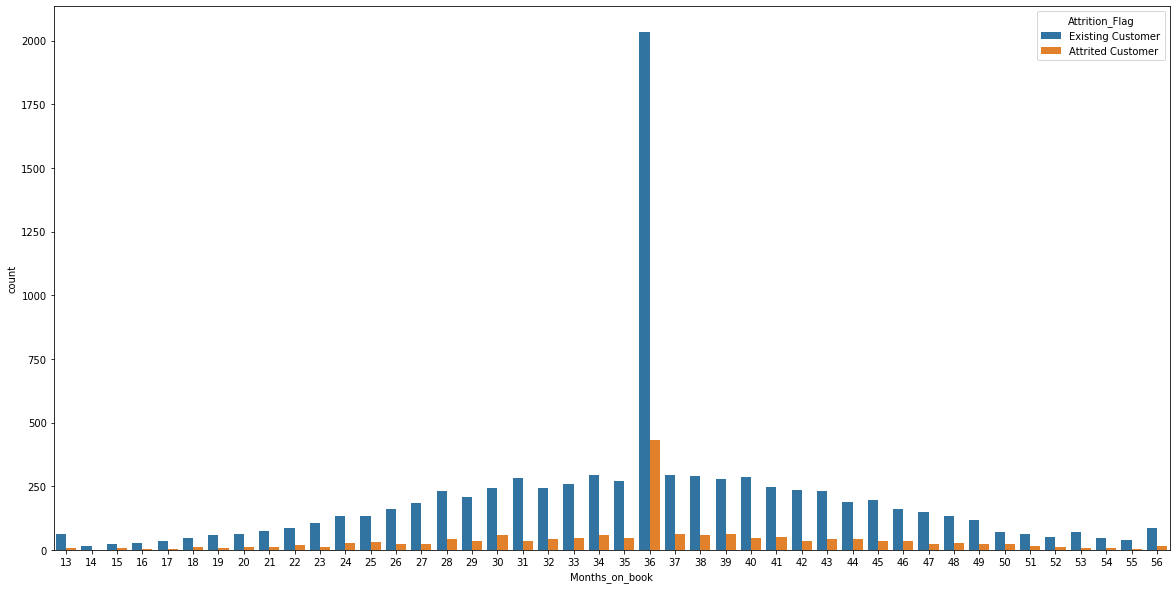

In [47]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Months_on_book', hue='Attrition_Flag')
plt.show()

- Distribution for months on book is also fairly normal, except with a very large spike in the middle right at 36 months. Majority of customers have had their cards for 3 years.
- With the amount of customers being so concentrated at 36 months we also see the most attrition at 36 months but this is expected given the proportions.

###Total Relationship Count vs. Attrition

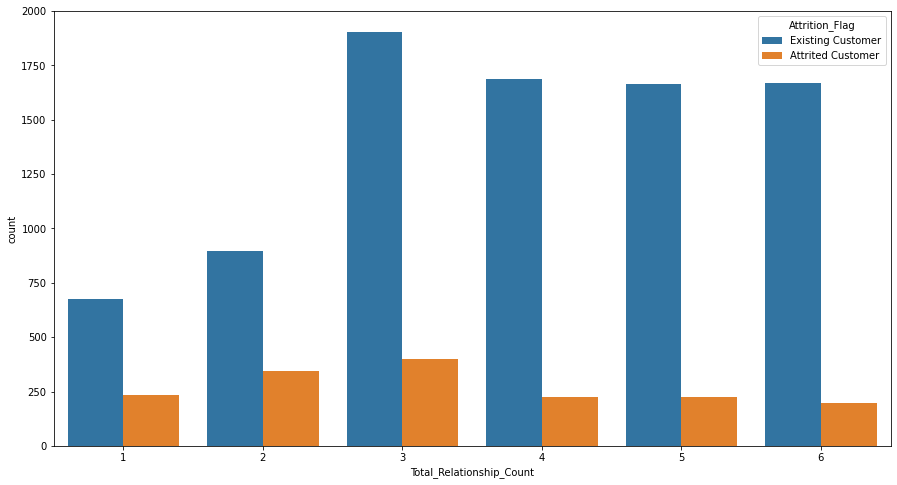

In [48]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='Total_Relationship_Count', hue='Attrition_Flag')
plt.show()

- Having 3 products with the bank is most common, but having 4 - 6 products are not too far behind at even rates.
- We expect to see attrition highest at those with 3 products proportionately but those with 1 and 2 products have higher attrition than 4 - 6 which is surprising. 
- 4 - 6 products have almost even rates across all 3 levels for both existing customers and attrition.

###Months Inactive (last 12 mo.) vs. Attrition

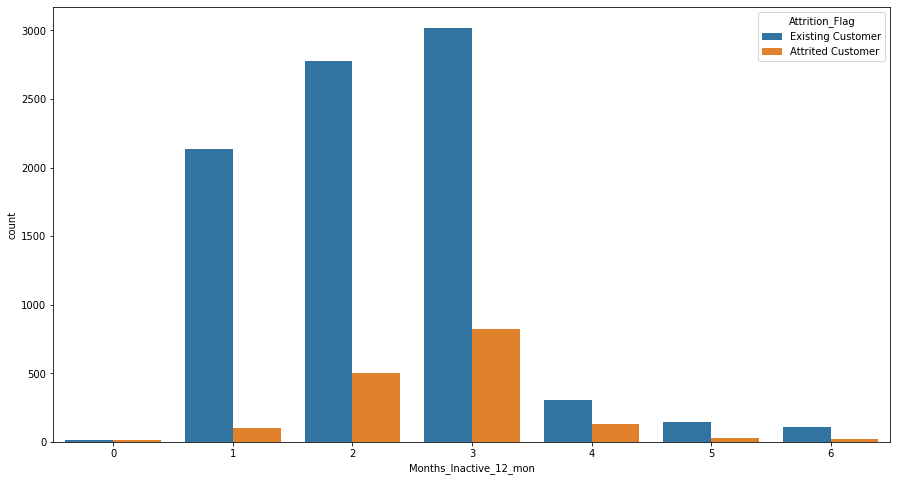

In [49]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='Months_Inactive_12_mon', hue='Attrition_Flag')
plt.show()

- Most customers only spent 1 - 3 months inactive out of the past year, with 3 months being most common and 2 months a close 2nd.
- Attrition is proportionate with 3 months inactive having the most customer attrition followed by 2 months.

###Contacts Count (last 12 mo.) vs. Attrition

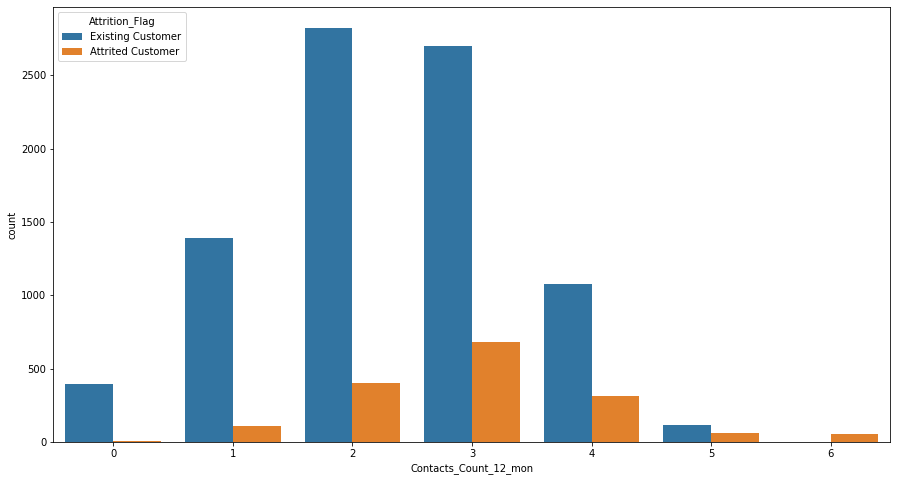

In [50]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='Contacts_Count_12_mon', hue='Attrition_Flag')
plt.show()

- Most customers were only contacted 2 - 3 times during the year with 2 contacts being the highest, yet those with 3 contacts had a higher attrition rate.

###Credit Limit vs. Attrition

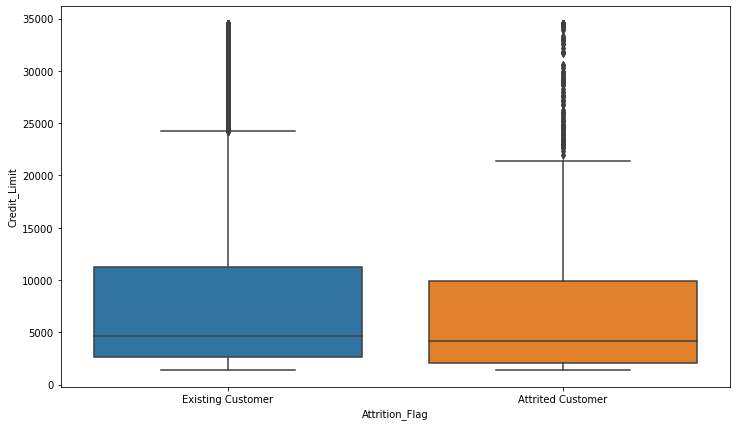

In [51]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Credit_Limit', x='Attrition_Flag')
plt.show()

- Existing customers and those who have attrited don't show any particular pattern with respect to credit limit as there are customers for both categories spanning the entrie range of credit limits.

###Total Revolving Balance vs. Attrition

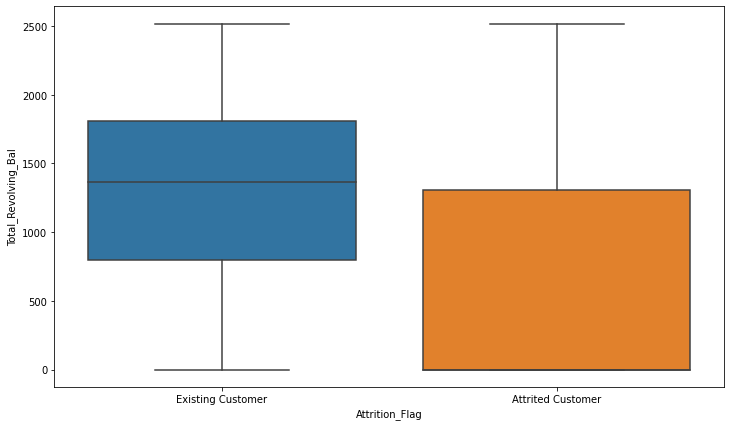

In [52]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Total_Revolving_Bal', x='Attrition_Flag')
plt.show()

- For the most part there are existing and attrited customers distrbuted throuhout the range of revolvoing balances, however almost no customers with a revolving balance less than 500 attrited, while a decent number of customers below a 500 revolving balance did attrite.
- More attrition for those with a low revolving balance may be because they were not using it enough, but that doesn't speak to attrition at all other levels.

###Avg. Open to Buy vs. Attrition 

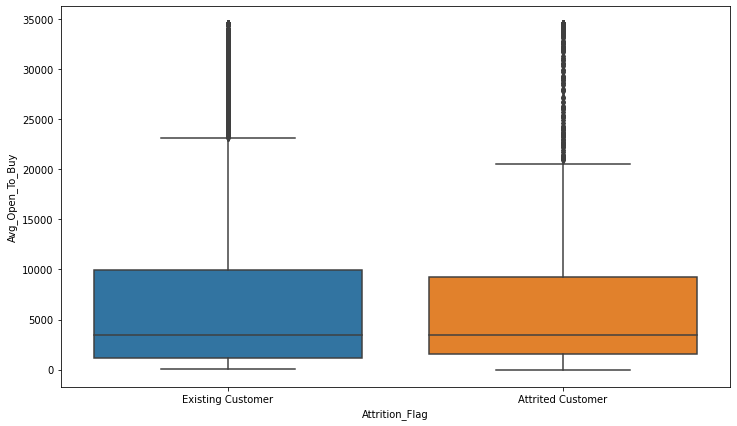

In [53]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Avg_Open_To_Buy', x='Attrition_Flag')
plt.show()

- There are existing and attrited customers across all levels of average credit amount open to make purchases, showing no pattern or correlations.

###Total Amount Change Q4 to Q1 vs. Attrition

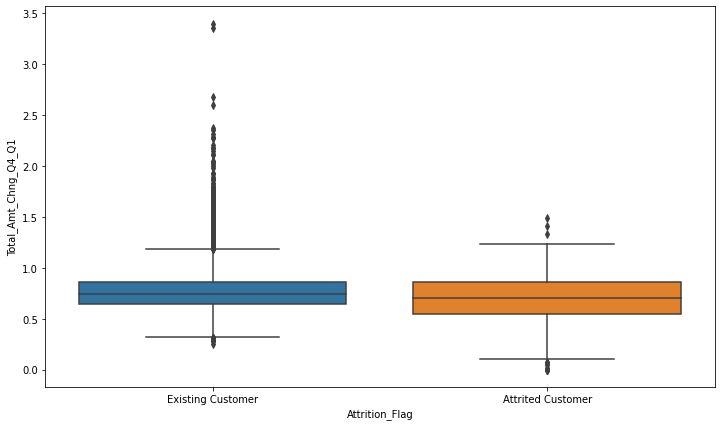

In [54]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Total_Amt_Chng_Q4_Q1', x='Attrition_Flag')
plt.show()

- No customers with an amount change ratio greater than 1.5 from Q4 to Q1 attrited. 
- This shows some futher evidence for the customers who are spending and using their cards less being more likely to attrite.

###Total Count Change Q4 to Q1 vs. Attrition

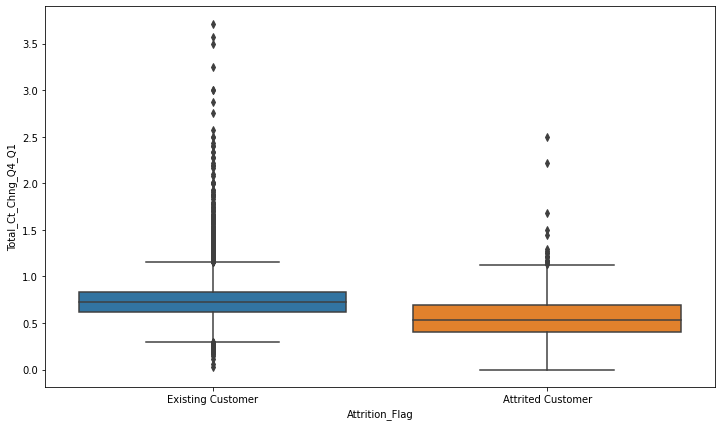

In [55]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag')
plt.show()

- Only a few customers whose transaction count ratio increased more than 1.5 from Q4 to Q1 attrited, while most attrition was seen at a count change ratio below 1.5.
- No customers above a 2.5 count ratio change from Q4 to Q1 attrited.
- It seems those who make a greater amount of transactions with their card are more likely to be existing customers.

###Total Transaction Amount vs. Attrition

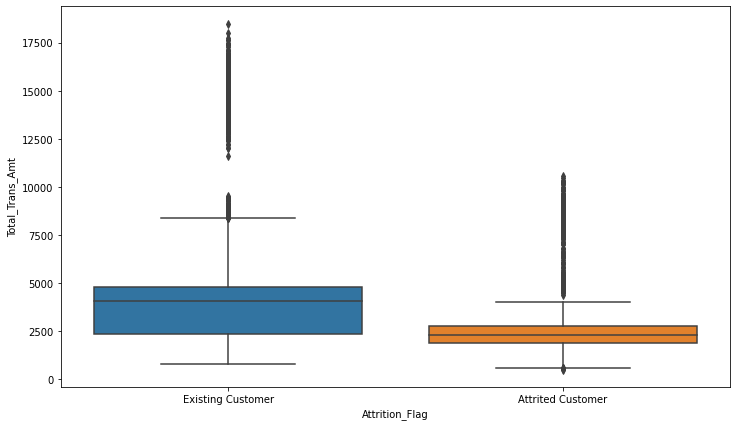

In [56]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Total_Trans_Amt', x='Attrition_Flag')
plt.show()

- Very few customers with transaction amounts over 10,000 attrited.

###Total Transaction Count vs. Attrition

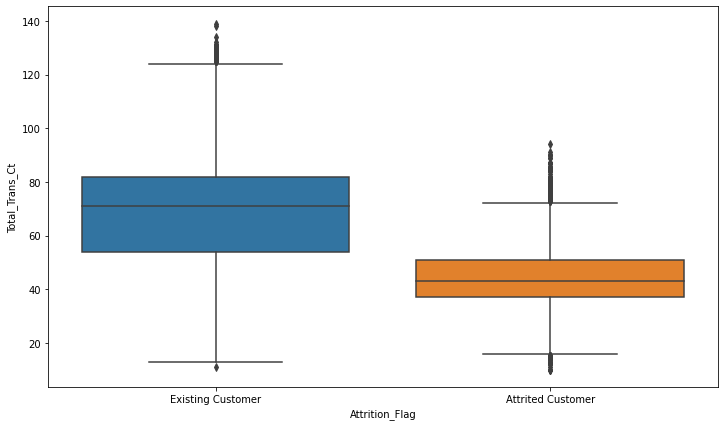

In [57]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Total_Trans_Ct', x='Attrition_Flag')
plt.show()

- No customers with over 100 transaction attrited.


###Avg. Utilization Ratio vs. Attrition

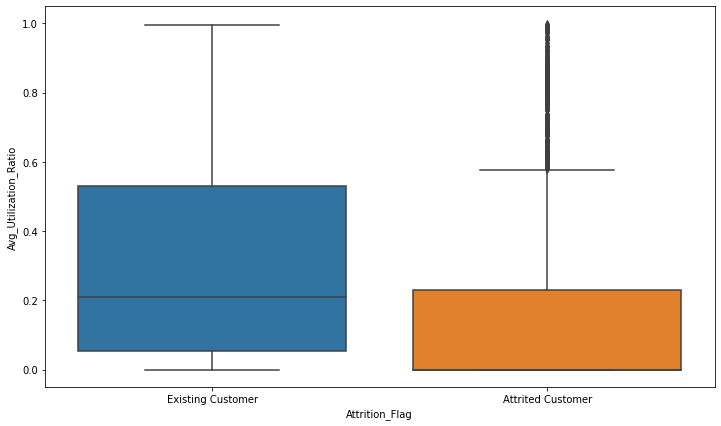

In [58]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, y='Avg_Utilization_Ratio', x='Attrition_Flag')
plt.show()

- Average utilization ratio does not appear to show any patterns with regards to whether or not a customer will attrite.

## Now we can look at how our repsonse variable relates to our categorical variables.

###Gender vs. Attrition

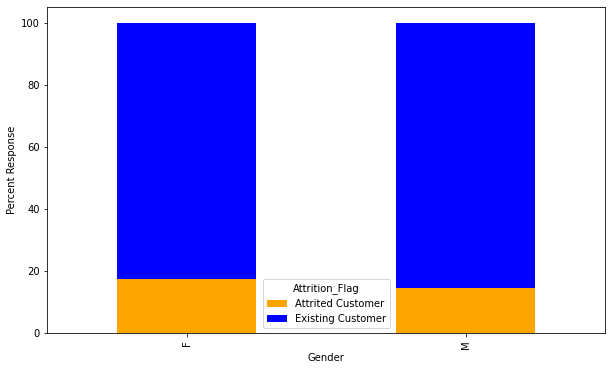

In [59]:
(pd.crosstab(data['Gender'], data['Attrition_Flag'], normalize='index') * 100).plot(
          kind='bar', figsize=(10, 6), stacked=True, color=['orange', 'blue']
      )
plt.ylabel('Percent Response');

- Levels of attrition for Males and Females are nearly even so there is no clear pattern of attrition with relation to Gender.

###Education Level vs. Attrition

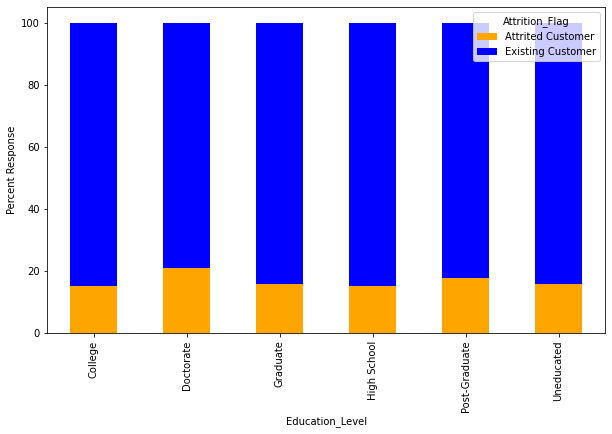

In [60]:
(pd.crosstab(data['Education_Level'], data['Attrition_Flag'], normalize='index') * 100).plot(
          kind='bar', figsize=(10, 6), stacked=True, color=['orange', 'blue']
      )
plt.ylabel('Percent Response');

- The attrition rate amongst those with a Doctorate is slightly higher than other education levels. The difference is not very significant though.
- Attrition rate seems nearly consistent across all other education levels showing no clear pattern.

### Marital Status vs. Attrition

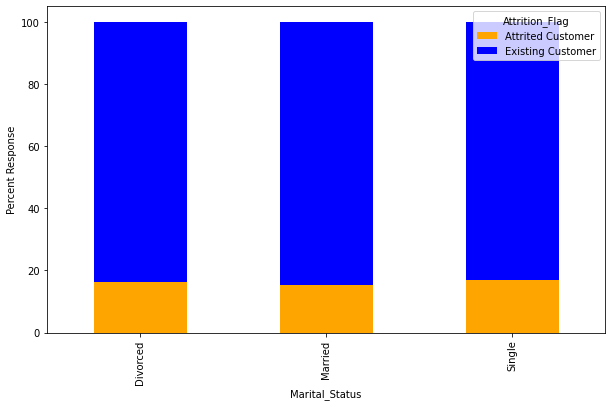

In [61]:
(pd.crosstab(data['Marital_Status'], data['Attrition_Flag'], normalize='index') * 100).plot(
          kind='bar', figsize=(10, 6), stacked=True, color=['orange', 'blue']
      )
plt.ylabel('Percent Response');

- Attrition Rate is split almost evenly across the different Marital Statuses, which shows no clear pattern.

### Income Category vs. Attrition

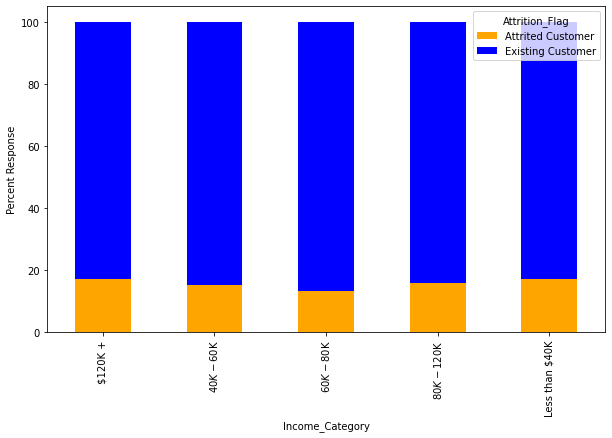

In [62]:
(pd.crosstab(data['Income_Category'], data['Attrition_Flag'], normalize='index') * 100).plot(
          kind='bar', figsize=(10, 6), stacked=True, color=['orange', 'blue']
      )
plt.ylabel('Percent Response');

- Attrition rate is fairly even across all Income Categories. No clear pattern is present.

###Card Category vs. Attrition

Text(0, 0.5, 'Percent Response')

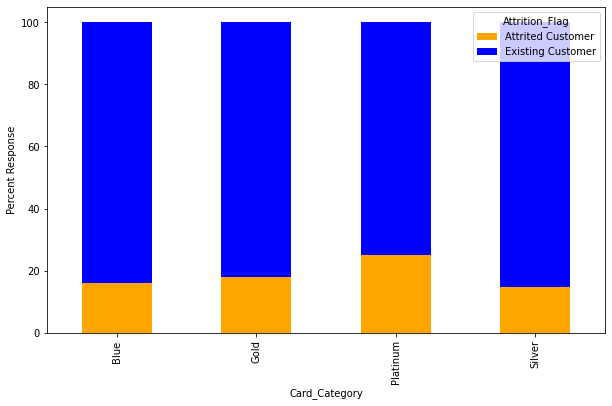

In [63]:
(pd.crosstab(data['Card_Category'], data['Attrition_Flag'], normalize='index') * 100).plot(
          kind='bar', figsize=(10, 6), stacked=True, color=['orange', 'blue']
      )
plt.ylabel('Percent Response')

- Customers with the Platinum level card have a higher attrition rate than the other card levels, but as we saw earlier there were only 20 customers total having Platinum level cards. 
- Silver level card holders show a slightly lower rate of attrition compared to the others, but again the difference is not significant.

# Multivariate Analysis

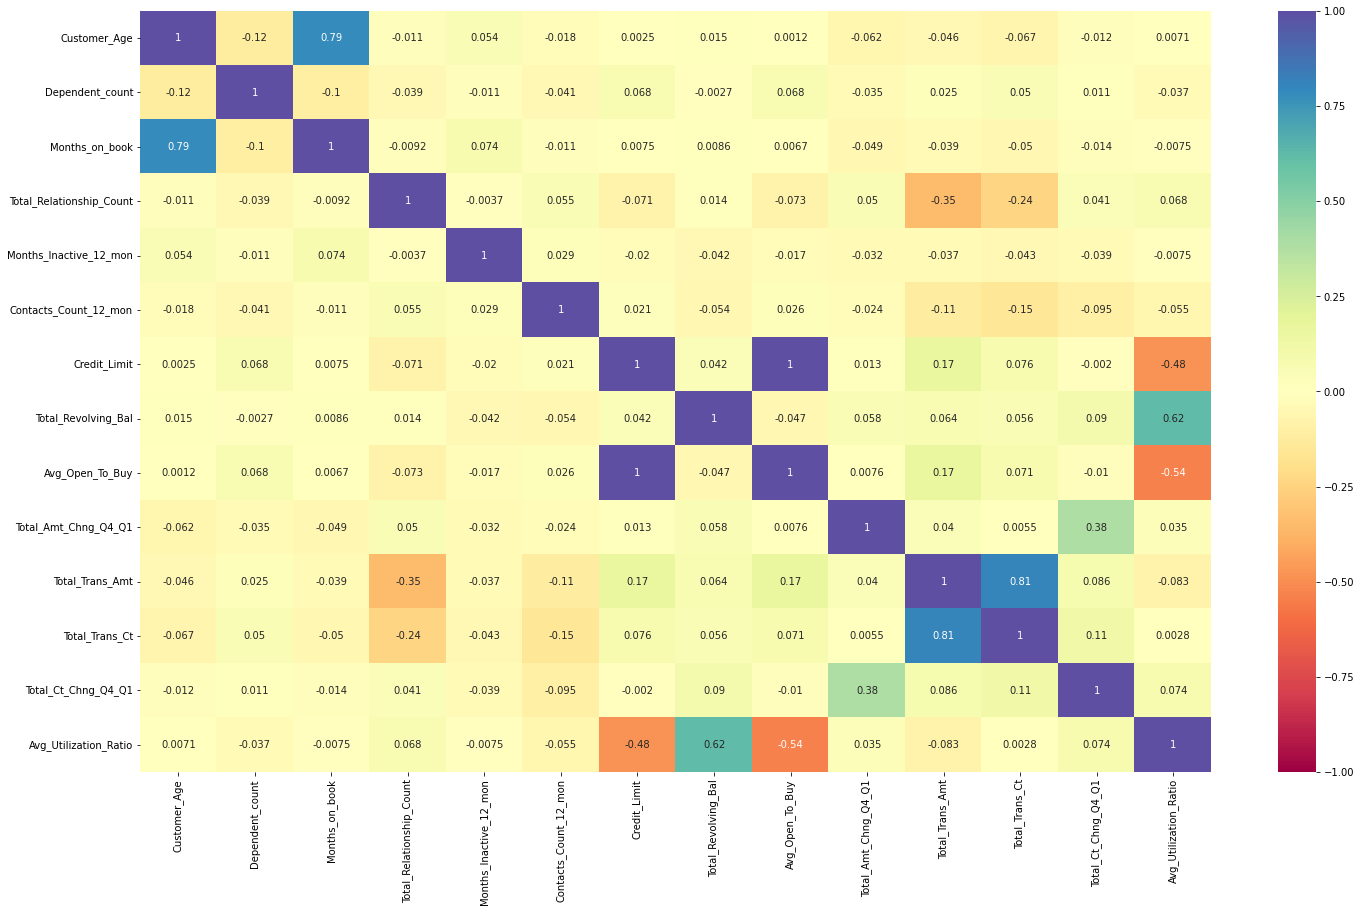

In [64]:
plt.figure(figsize=(24, 14))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, cmap='Spectral')
plt.show()

- Avg. Open to Buy and Credit limit have an absolute 1.0 correlation. It seems that customers available credit has a direct positive correlation with their credit limit.
- We can see that there is a fairly strong correlation of 0.81 between Total Transaction Amount and Total Transaction Count but this is to be expected as typically more transactions will add up to a greater total amount.
- Customer Age and months on book seem to show a correlation of 0.79 which is interesting as a large majority of customers months on book was 36 months. We will need to take a closer look at this.
- There is some moderate correlation between Total Revolving Balance and Avg. Utilization Ratio but this makes sense as your utilization ratio will typically be influenced by your total revolving balance.
There is also some negative correlation seen between Avg. Utilization Ratio and Avg. Open to Buy at -0.54 and Avg. Utilization Ratio and Credit Limit at -0.48

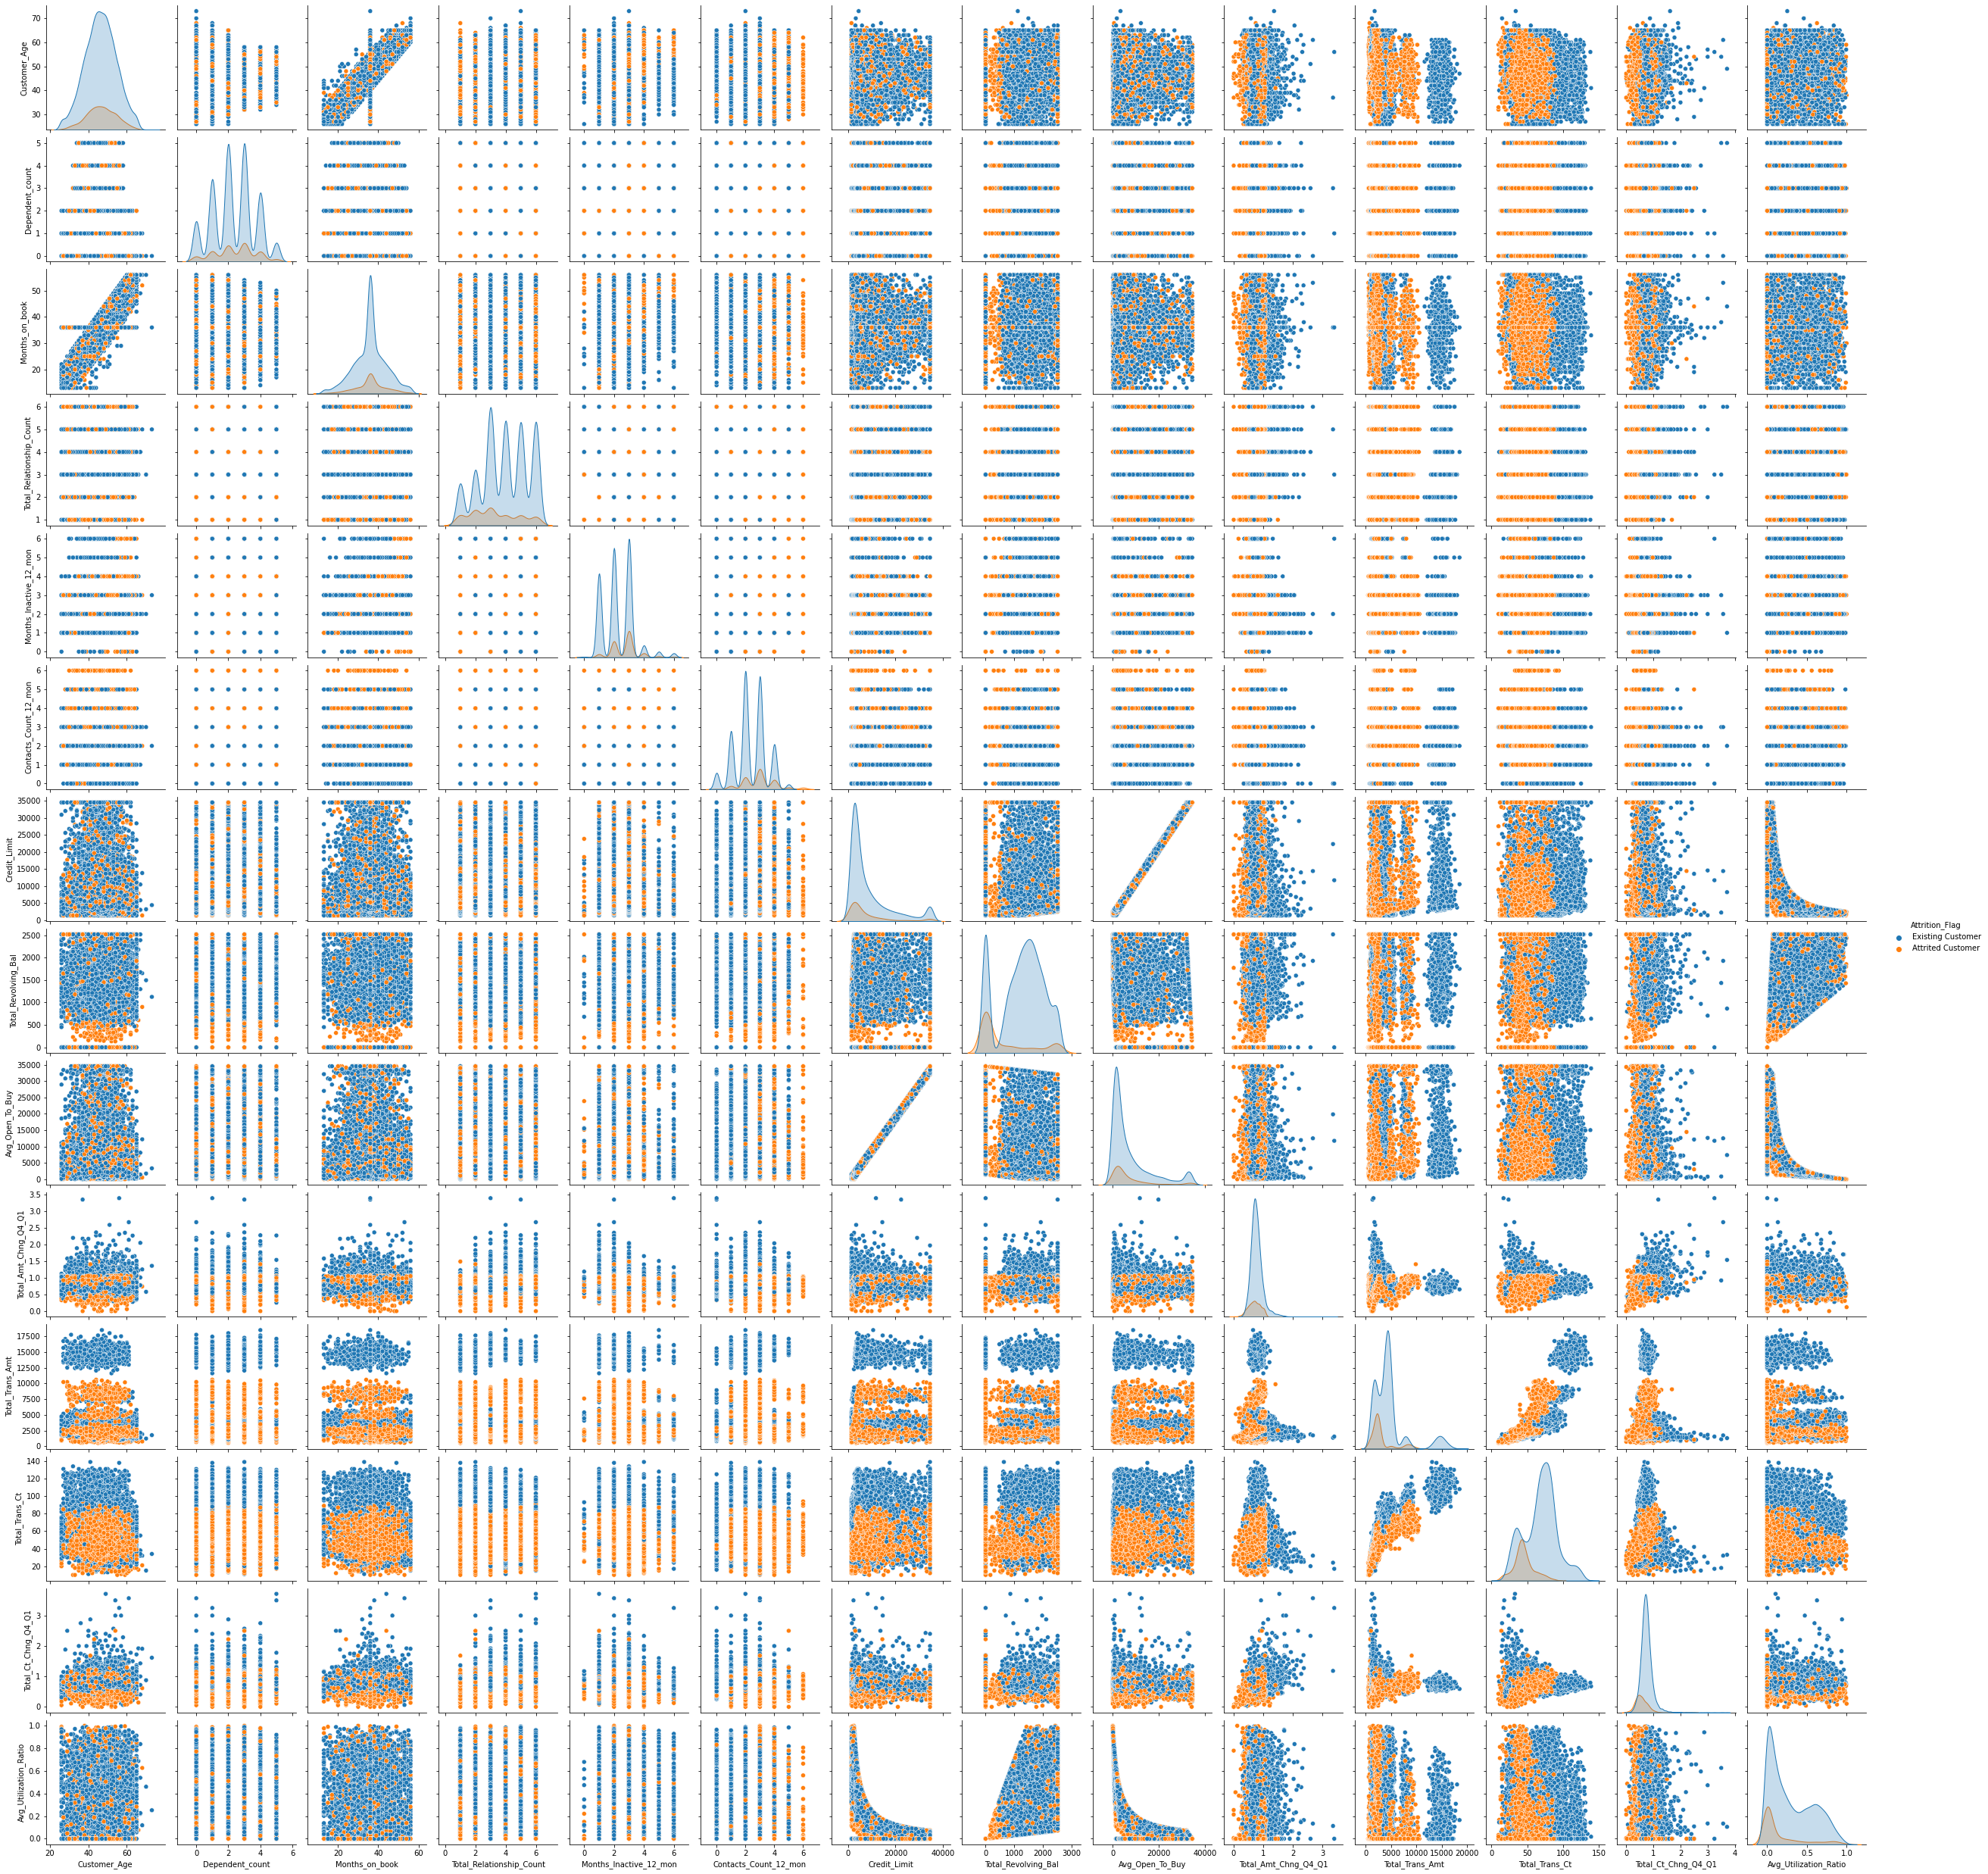

In [65]:
sns.pairplot(data, hue='Attrition_Flag')
plt.show()

- Looking just at the correlations we saw in the heatmap, there doesn't seem to be any clear pattern of existing customers vs. those who attrited except for when it comes to Total Transaction Amount and Total Transaction Count.
- With Total Transaction Count and Amount correlation we see that the customers who attrited seem to be clustered in the bottom left corner of the plot showing that there is a correlation between customers who attrited and lower transaction amount and lower transaction count.
- In fact both Transaction amount and count show a pattern of attrited customers on the low side across their relationships with multiple variables and not just the correlation with each other. This further supports the idea that customers who are using their card less are more likely to attrite.
- Total amount and count change Q4 to Q1 show a similar trend of those with total transaction amount and count change, being that the customers who attrited seem to be concentrated on the lower end of the plot.
- We do have some cases of multicollinearity that we will need to address before building our model.

#Summary of EDA

- Our response variable is Attrition_Flag which is telling us if they are an existing customer or if they have attrited. The data for Attrition_Flah is highly imbalance so we will need to account for this when building our models.
- The mean age of customers is 46 and we saw that age correlates with months on book in that the older the customer's age the more months they have on book.
- Months on book has a large spike of customers at 36 months, perhaps the bank did a big credit card promotion 3 years ago and successfully increased their customer base. However there doesn't seem to be any pattern between existing cutomers and attrited in relation to either months on book or customer age.
- Relationship Count shows that most customers have more than one product with Thera bank.
- The majority of customers were only inactive 1-3 months out of the last year. Those inactive for 0, 5, or 6 months are considered outliers.
- The histogram and boxplot for Contacts count in the last 12 months looks very similar to the plots for inactive in the last 12 months. I would think that more contact from the bank would help prevent customers from being inactive but the correlation between the 2 is suprisingly low at only 0.29
- Credit Limit is vary right skewed with many outliers and so is Avg. Open to Buy.  In fact they have an absolute correlation of 1.0, because of this I will drop Avg. Open to Buy in order to avoid multicollinearity in our models.
- Total Revoloving Balance shsows that many customers keep a 0 balance on their card.
- Avg. Utilization Ratio shows a high number of customers with a 0 ratio this has a moderate correlation with Total Revolving Balance at 0.62
- Total Transaction Amount and Count are highly correlated at 0.81 which makes sense as typically the more purchases you make the higher your total amount will be. 
- We also see a pattern amongst Total transaction Amount and Count of the custers who attrited all being clustered in the lower left corner which seems to show that those who use their card less are more likely to attrite.
- As the correlation with Total Transaction Amount and Count is high, I will drop Total Transaction Count to avoid multicollinearity when building our models. 
- Total Amount and Count Change Q4 to Q1 have very similar histograms and boxplots, both being right skewed with many outliers. Suprisingly though their correlation is not very high at only 0.38, but we do see the pattern of customers with low transaction amounts and counts Q4 to Q1 being the ones who are more likely to attrite.
- The categorical columns did not show any strong patterns in relation to our response variable. S
- For Card Category a large majority of customers have the entry level Blue Card, while only 20 customers have the platinum card, yet attrition rates amongst all card level are fairly close with platinum actually haveing the highest attrition rate.
- There are more female customers than male but no noticeable pattern of attrition when it comes to Gender.
- There are more married customers and more customers with a Graduate level eduation. There was also no clear pattern in relation to attrition with either Marital Status or Education Level.



#Data Processing

Let's first start by dropping some columns in order to help avoid multicollinearity.


In [66]:
data.drop(['Avg_Open_To_Buy'], axis=1, inplace=True)

In [67]:
data.drop(['Total_Trans_Ct'], axis=1, inplace=True)

###Setting Response variable so that 'Attrited Customer' is = 1, and 'Existing Customer' = 0

In [68]:
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Attrited Customer', 1)

In [69]:
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Existing Customer', 0)

In [70]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0     12691.000                  777                 1.335             1144   
1      8256.000                  864                 1.541             1291   
2      3418.000                    0                 2.594             1887   
3      3313.000                 2517                 1.405             1171   
4      4716.000                    0                 2.175              816   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                1.625                  0.061  
1                3.714                  0.105  
2                2.333                  0.000  
3                2.333                  0.760  
4                2.500                  0.000

In [71]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

- We have successfully dropped 'Avg_Open_To_Buy' and 'Total_Trans_Ct' from our dataframe which should help us avoid multicollinearity in our models.
- Attrition Flag values have been succesfully changed so that 'Attrited Customer' = 1 and 'Existing Customer' = 0

#Model Building

##Evaluation criterion:
###Model potential wrong predictions are:
1. Predicting a customer will attrite when the customer will instead remain as an existing customer - Loss of resources in contacting and marketing to prevent attrition when unnecessary.
2. Predicting a customer will remain an existing customer when the customer will actually attrite - Loss of credit card customer and income

###Which is more important?
- Predicting the customer will remain an existing customer when they will actually attrite meaning a loss of income for the Thera bank as they will no longer acquire fees and interest from that customer's credit card account.

### To reduce this loss we will need to try and reduce False Negatives
- We can accomplish this by focusing on maximizing Recall score in out models.  The greater the Recall the lower the chance of false negatives.

#Splitting the Data

In [72]:
X = data.drop(columns='Attrition_Flag')
X = pd.get_dummies(X)

Y = data['Attrition_Flag']

# We will split the data into training, validation, and test sets
# 1st we split the data into temp and test sets

X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# then we split temp into training and validation sets

X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size =0.25, random_state=1, stratify=Y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 32) (2026, 32) (2026, 32)


#Class Balancing
We know that our Target variable 'Attrition Flag' has a high class imbalance. In order to try and account for this in our models we will try out four class balancing strategies.

In [73]:
# creat a function for our class balancing strategies
# we will create 5 choices to represent our straegies (0-4)
def data_balancing(X_train, Y_train, choice):
    if choice==0: 
      sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

    elif choice==1:
      sm = RandomUnderSampler(random_state=1)

    elif choice==2:
      sm = NearMiss(version=1)

    elif choice==3:
      sm = RandomOverSampler(random_state=1)
    
    elif choice==4: 
      return X_train, Y_train

# Creating X and Y train sample in our to resample out training data
    X_train_sample, Y_train_sample = sm.fit_resample(X_train, Y_train)

    return X_train_sample, Y_train_sample

###Now we will creat a function to build our class balancing models with cross validation

In [74]:
def create_model(choice):

    """
    choice = choice of class balancing strategy 
    from our data_balancing function
    """

    models = []   # empty list for storing our models

    # We will append our models to the list
    models.append(('Bagging', BaggingClassifier(random_state=1)))
    models.append(('Random Forest', RandomForestClassifier(random_state=1)))
    models.append(('Gradient Boost', GradientBoostingClassifier(random_state=1)))
    models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
    models.append(('XGBoost', XGBClassifier(random_state=1, eval_metric='logloss')))
    models.append(('DTree', DecisionTreeClassifier(random_state=1)))

    results = [] # empty list for model CV scores

    names = []  # empty list for model names

    # creat loop to get the mean CV score for each modeal
    print('\n' ' CV Performance:' '\n')

    for name, model in models:
        scoring = 'recall' # scoring for K fold CV

        # Stratified K Fold CV
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

        cv_result=[]  # empty list for CV results

         # create loop to go through training and validation. SMOTE is applied on all Training Folds.
        for train_ix, validate_ix in kfold.split(X_temp, Y_temp):

            # Separate training and validation data
            train_X, val_X = X_temp.iloc[train_ix], X_temp.iloc[validate_ix]
            train_Y, val_Y, = Y_temp.iloc[train_ix], Y_temp.iloc[validate_ix]

            # train_X and train_Y are data from k-1 folds
            X_train_un, y_train_un, = data_balancing(train_X, train_Y, choice)
            model.fit(X_train_un, y_train_un)
            Y_pred = model.predict(val_X) # Left out fold
            recall_val = recall_score(val_Y, Y_pred)
            cv_result.append(recall_val)

        results.append(cv_result)
        names.append(name)

        print('Model {}: Class Balancing + Stratified CV gives avg. Recall {}'.format(
                name, round(np.mean(cv_result)*100, 2)
        ))
        
    return results, names

###SMOTE

In [75]:
results_SMOTE, names_SMOTE=create_model(0)


 CV Performance:

Model Bagging: Class Balancing + Stratified CV gives avg. Recall 80.26
Model Random Forest: Class Balancing + Stratified CV gives avg. Recall 75.96
Model Gradient Boost: Class Balancing + Stratified CV gives avg. Recall 83.18
Model AdaBoost: Class Balancing + Stratified CV gives avg. Recall 78.65
Model XGBoost: Class Balancing + Stratified CV gives avg. Recall 83.02
Model DTree: Class Balancing + Stratified CV gives avg. Recall 76.88


- Gradient Boost and XGBoost give the highest recall when using SMOTE but Gradient Boost is slightly higher.

###Random Under Sampling

In [76]:
results_Rus, names_Rus=create_model(1)


 CV Performance:

Model Bagging: Class Balancing + Stratified CV gives avg. Recall 90.86
Model Random Forest: Class Balancing + Stratified CV gives avg. Recall 90.09
Model Gradient Boost: Class Balancing + Stratified CV gives avg. Recall 93.09
Model AdaBoost: Class Balancing + Stratified CV gives avg. Recall 90.25
Model XGBoost: Class Balancing + Stratified CV gives avg. Recall 93.16
Model DTree: Class Balancing + Stratified CV gives avg. Recall 89.17


- Using Random Under Sampling Gradient Boost and XGBoost are once again giving the best performances for recall except this time XGBoost is slightly higher.

###Near Miss

In [77]:
results_NM, names_NM=create_model(2)


 CV Performance:

Model Bagging: Class Balancing + Stratified CV gives avg. Recall 83.64
Model Random Forest: Class Balancing + Stratified CV gives avg. Recall 89.17
Model Gradient Boost: Class Balancing + Stratified CV gives avg. Recall 91.01
Model AdaBoost: Class Balancing + Stratified CV gives avg. Recall 87.71
Model XGBoost: Class Balancing + Stratified CV gives avg. Recall 90.01
Model DTree: Class Balancing + Stratified CV gives avg. Recall 80.42


- Again Gradient Boost and XGBoost are the top performers, but this time with using the Near Miss strategy Gradient Boost if giving the best result for recall.

### Random Over Sampling

In [78]:
results_Ros, names_Ros=create_model(3)


 CV Performance:

Model Bagging: Class Balancing + Stratified CV gives avg. Recall 80.41
Model Random Forest: Class Balancing + Stratified CV gives avg. Recall 75.5
Model Gradient Boost: Class Balancing + Stratified CV gives avg. Recall 92.4
Model AdaBoost: Class Balancing + Stratified CV gives avg. Recall 89.32
Model XGBoost: Class Balancing + Stratified CV gives avg. Recall 92.09
Model DTree: Class Balancing + Stratified CV gives avg. Recall 74.88


- Gradient Boost and XGBoost continue to give the best results with Gradient Boost performing a little better this time.


###Let's visualize the Random Under Sampling result.

In [79]:
results_Rus

[[0.9042145593869731,
  0.9307692307692308,
  0.9153846153846154,
  0.8923076923076924,
  0.9003831417624522],
 [0.9118773946360154,
  0.9153846153846154,
  0.9115384615384615,
  0.8846153846153846,
  0.8812260536398467],
 [0.9425287356321839,
  0.9192307692307692,
  0.95,
  0.9346153846153846,
  0.9080459770114943],
 [0.9233716475095786,
  0.8769230769230769,
  0.9423076923076923,
  0.8961538461538462,
  0.8735632183908046],
 [0.9540229885057471,
  0.926923076923077,
  0.9461538461538461,
  0.9230769230769231,
  0.9080459770114943],
 [0.8850574712643678,
  0.8884615384615384,
  0.8846153846153846,
  0.8846153846153846,
  0.9157088122605364]]

In [80]:
# XGBoost recall values for the 5 validation folds
results_Rus[4]

[0.9540229885057471,
 0.926923076923077,
 0.9461538461538461,
 0.9230769230769231,
 0.9080459770114943]

In [81]:
# setting XGB to = Random Under Sampling results and checking XGB median
XGB=results_Rus[4]
print(np.median(XGB))

0.926923076923077


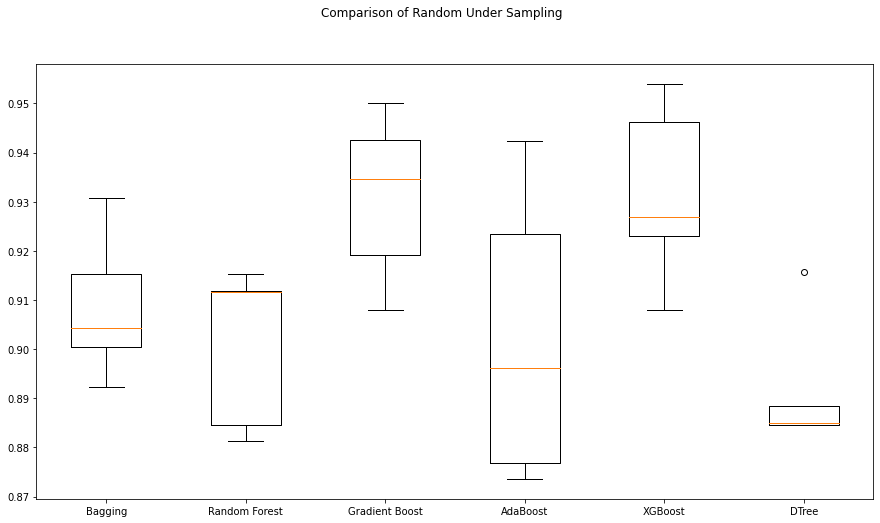

In [82]:
# Boxplots of the CV scores for all models
fig = plt.figure(figsize=(15,8))

fig.suptitle('Comparison of Random Under Sampling')
ax = fig.add_subplot(111)

plt.boxplot(results_Rus)
ax.set_xticklabels(names_Rus)

plt.show()

### Summary of model CV Performance
- Gradient Boost performed slightly better in 3 out of the 4 class balancing strategies (SMOTE, Near Miss, and Random Over Sampling). 
- XGBoost only performed the best in 1 out of the 4 balancing strategies, but it did give the highest overall recall score of 93.16 on Random Under Sampling, and it was the 2nd best performer on rest of the models behind Gradient Boost.
- The 2 highest performing models overall were Random Under Sampling and Random Over Sampling.
- Out of those 2 models the Random Under Sampling yielded the highest recall scores for both XGBoost, and Gradient Boost, with XGBoost being the highest.
- The 3rd best performing model on Random Under Sampling was AdaBoost.
- Given these results the 3 models we will work on tuning will be XGBoost, Gradient Boost, and AdaBoost given the Random Under Sampline class balancing strategy.

#Hyper parameter Tuning


In [83]:
# define function for metrics to check performance 
def model_perf_class_sklearn(model, predictors, target):
    """
    Function for metrics to check model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predict independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # create dataframe for metrics
    df_perf = pd.DataFrame(
        {
            'Accuracy': acc,
            'Recall': recall,
            'Precisiion': precision,
            'F1': f1
        },
        index=[0]
    )

    return df_perf

In [84]:
# create function for confusion matrix with sklearn
def cm_sklearn(model, predictors, target):
    """
    plot confusion_matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Tuning XGBoost
##Grid Search CV

In [86]:
# define model
model = XGBClassifier(random_state=1, eval_metric='logloss')


X_train_b, Y_train_b = data_balancing(X_temp, Y_temp, 1) # choice 1 is Random Under Sampling

# Parameter grid to pass in GridSearchCV
param_grid = {'n_estimators': np.arange(50, 100, 50),
              'learning_rate': [0.01, 0.1],
              'gamma': [0,1],
              }

# Type of scoring used
scorer = metrics.make_scorer(metrics.recall_score)

# Run grid search
grid_obj = GridSearchCV(model, param_grid, scoring=scorer, n_jobs=-1, cv=2)

grid_obj = grid_obj.fit(X_train_b, Y_train_b) # train data

# Set clf to the best combination of parameters
xgb_estimator = grid_obj.best_estimator_

# Fit best algorithm to the data
xgb_estimator.fit(X_train_b, Y_train_b)

XGBClassifier(eval_metric='logloss', n_estimators=50, random_state=1)

In [96]:
%%time

from imblearn.pipeline import Pipeline

# define model
model = XGBClassifier(random_state=1, eval_metic='logloss')

# define class balancing
sm = RandomUnderSampler()

# pipeline
pipeline = Pipeline([('sampling', sm), ('class', model)])

# Parameter grid to pass in GridSearchCV
param_grid={'class__n_estimators': np.arange(50, 150, 50),
            'class__learning_rate': [0.001, 0.01, 0.1],
            'class__gamma': [0,1],
            'class__subsample': [0.8, 0.9, 1],
            'class__reg_lambda':[5,10]
            }

# scoring
scorer = metrics.make_scorer(metrics.recall_score)

# call GridSearchCV
grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fit parameters
grid_cv.fit(X_temp, Y_temp)

print('Best parameters are {} with CV score={}:'.format(grid_cv.best_params_, grid_cv.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are {'class__gamma': 0, 'class__learning_rate': 0.1, 'class__n_estimators': 100, 'class__reg_lambda': 5, 'class__subsample': 0.8} with CV score=0.9323902151488358:
CPU times: user 4.15 s, sys: 310 ms, total: 4.46 s
Wall time: 1min 5s


In [97]:
# building model with best parameters

X_train_over, Y_train_over = sm.fit_resample(X_temp, Y_temp)

xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    subsample=0.8,
    learning_rate=0.1,
    gamma=0,
    eval_metric='logloss',
    reg_lambda=5
)

# Fit the model on training data
xgb_tuned1.fit(X_train_over, Y_train_over)

XGBClassifier(eval_metric='logloss', random_state=1, reg_lambda=5,
              subsample=0.8)

In [109]:
# Calculating metrics on validation set
xgboost_grid_val = model_perf_class_sklearn(xgb_tuned1, X_test, Y_test)
print('Test Performance:')
xgboost_grid_val

Test Performance:


Accuracy  Recall  Precisiion    F1
0     0.922   0.938       0.688 0.794

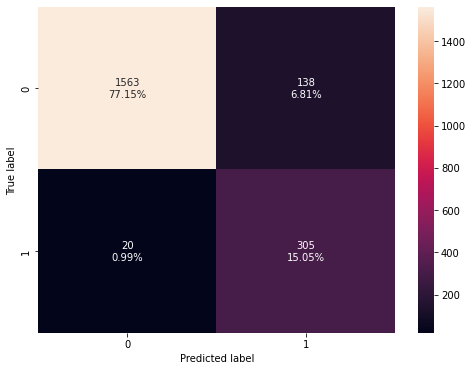

In [99]:
cm_sklearn(xgb_tuned1, X_test, Y_test)

##Randomized Search CV

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
%%time

# define model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# parameter grid to pass in GridSearchCV
param_grid={'class__n_estimators': np.arange(50, 150, 50),
            'class__learning_rate': [0.01, 0.1],
            'class__gamma': [0,1],
            'class__subsample': [0.8, 0.9, 1],
            'class__reg_lambda': [5, 10]}

# Type of scoring
scorer = metrics.make_scorer(metrics.recall_score)

sm = RandomUnderSampler()

pipeline = Pipeline([('sampling', sm), ('class', model)])

# Call RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1, n_jobs= -1)

#Fit parameters in RandomizedSearchCV
xgb_tuned2.fit(X_temp, Y_temp)

print('Best parameters are {} with CV score {}:'.format(xgb_tuned2.best_params_, xgb_tuned2.best_score_))

Best parameters are {'class__subsample': 1, 'class__reg_lambda': 5, 'class__n_estimators': 100, 'class__learning_rate': 0.1, 'class__gamma': 1} with CV score 0.9254877689360448:
CPU times: user 854 ms, sys: 87.6 ms, total: 942 ms
Wall time: 11.3 s


In [102]:
# build model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    subsample=1, reg_lambda= 5, n_estimators= 100, learning_rate=0.1, gamma=1, eval_metric='logloss'
)

X_train_over, Y_train_over = sm.fit_resample(X_temp, Y_temp)

# Fit model on train data
xgb_tuned2.fit(X_train_over, Y_train_over)

XGBClassifier(eval_metric='logloss', gamma=1, random_state=1, reg_lambda=5)

In [107]:
# Calulate metrics on validation set
xgboost_random_val = model_perf_class_sklearn(xgb_tuned2, X_test, Y_test)
print('Test Performance:')
xgboost_random_val

Test Performance:


Accuracy  Recall  Precisiion    F1
0     0.931   0.945       0.716 0.814

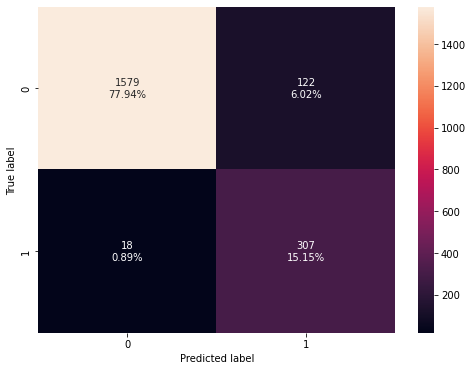

In [108]:
cm_sklearn(xgb_tuned2, X_test, Y_test)

- Randomized Search CV for the xgboost model returned the best recall score 0.945 and it also gave a better generalized result across all metrics vs the GridsearchCV xgboost.
- Now let's try tuning our other models and see what kind of results we get.

#Tuning Gradient Boost
##Grid Search CV

In [111]:
# define model
model = GradientBoostingClassifier(random_state=1)

X_train_b, Y_train_b = data_balancing(X_temp, Y_temp, 1)

# Grid parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring 
scorer = metrics.make_scorer(metrics.recall_score)

# Run grid search
grid_obj = GridSearchCV(model, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_b, Y_train_b)

# Set clf to the best combination of parameters
gbc_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_estimator.fit(X_train_b, Y_train_b)

GradientBoostingClassifier(max_features=0.8, n_estimators=150, random_state=1,
                           subsample=1)

In [112]:
%%time

# define model
model = GradientBoostingClassifier(random_state=1)

# define class balancing
sm = RandomUnderSampler()

# pipeline
pipeline = Pipeline([('sampling', sm), ('class', model)])

# Parameter grid to pass in GridSearchCV
param_grid={'class__n_estimators': [100,150,200,250],
            'class__subsample': [0.8, 0.9, 1],
            'class__max_features':[0.7,0.8,0.9,1]
            }
   
  
    

# scoring
scorer = metrics.make_scorer(metrics.recall_score)

# call GridSearchCV
grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fit parameters
grid_cv.fit(X_temp, Y_temp)

print('Best parameters are {} with CV score={}:'.format(grid_cv.best_params_, grid_cv.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters are {'class__max_features': 0.8, 'class__n_estimators': 250, 'class__subsample': 0.8} with CV score=0.9492838196286473:
CPU times: user 4.59 s, sys: 357 ms, total: 4.95 s
Wall time: 2min 27s


In [117]:
# build model with best parameters

X_train_over, Y_train_over = sm.fit_resample(X_temp, Y_temp)

gbc_tuned1 = GradientBoostingClassifier(
    random_state=1,
    n_estimators=250,
    subsample=0.8,
    max_features=0.8
)

# Fit the model on training data
gbc_tuned1.fit(X_train_over, Y_train_over)

GradientBoostingClassifier(max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [118]:
# Calculate metrics on validation set
gbc_grid_val = model_perf_class_sklearn(gbc_tuned1, X_test, Y_test)
print('Test Performance:')
gbc_grid_val

Test Performance:


Accuracy  Recall  Precisiion    F1
0     0.942   0.951       0.754 0.841

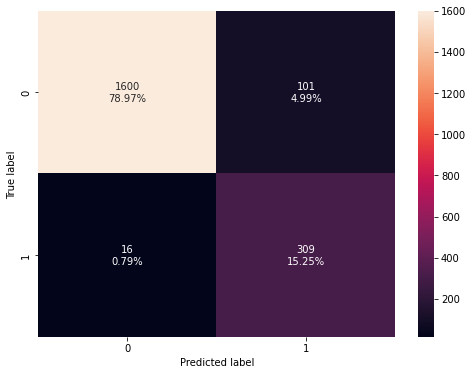

In [133]:
cm_sklearn(gbc_tuned1, X_test, Y_test)

##Randomized Search CV

In [121]:
%%time

# define model
model = GradientBoostingClassifier(random_state=1)

# parameter grid to pass in GridSearchCV
param_grid={'class__n_estimators': [100,150,200,250],
            'class__subsample': [0.8, 0.9, 1],
            'class__max_features':[0.7,0.8,0.9,1]}

# Type of scoring
scorer = metrics.make_scorer(metrics.recall_score)

sm = RandomUnderSampler()

pipeline = Pipeline([('sampling', sm), ('class', model)])

# Call RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1, n_jobs= -1)

#Fit parameters in RandomizedSearchCV
gbc_tuned2.fit(X_temp, Y_temp)

print('Best parameters are {} with CV score {}:'.format(gbc_tuned2.best_params_, gbc_tuned2.best_score_))

Best parameters are {'class__subsample': 0.8, 'class__n_estimators': 250, 'class__max_features': 0.9} with CV score 0.9431506041850868:
CPU times: user 2.19 s, sys: 71.8 ms, total: 2.26 s
Wall time: 33.8 s


In [122]:
# build model with best parameters
gbc_tuned2 = XGBClassifier(
    random_state=1,subsample=0.8, n_estimators= 250, max_features=0.9
    )

X_train_over, Y_train_over = sm.fit_resample(X_temp, Y_temp)

# Fit model on train data
gbc_tuned2.fit(X_train_over, Y_train_over)

XGBClassifier(max_features=0.9, n_estimators=250, random_state=1, subsample=0.8)

In [123]:
# Calulate metrics on validation set
gbc_random_val = model_perf_class_sklearn(gbc_tuned2, X_test, Y_test)
print('Test Performance:')
gbc_random_val

Test Performance:


Accuracy  Recall  Precisiion    F1
0     0.945   0.960       0.759 0.848

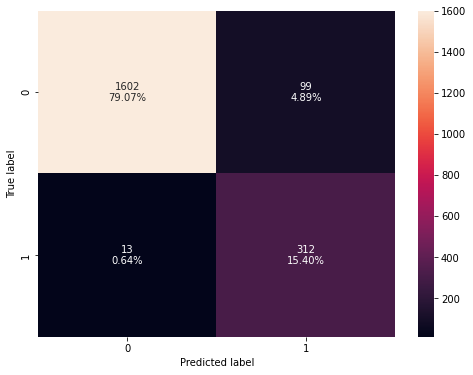

In [124]:
cm_sklearn(gbc_tuned2, X_test, Y_test)

- Recall for random search CV on Gradient Boosting has improved recall to 0.96 which is both higher than grid search and higher than both scores from xgboost.
- Now let's take at our 3rd model we selected to see how it performs.


#Tuning AdaBoost
##Grid Search CV


In [126]:
# define model
model = AdaBoostClassifier(random_state=1)

X_train_b, Y_train_b = data_balancing(X_temp, Y_temp, 1)

# Grid parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring 
scorer = metrics.make_scorer(metrics.recall_score)

# Run grid search
grid_obj = GridSearchCV(model, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train_b, Y_train_b)

# Set clf to the best combination of parameters
abc_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_estimator.fit(X_train_b, Y_train_b)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1.9000000000000001, n_estimators=10,
                   random_state=1)

In [129]:
%%time

# define model
model = AdaBoostClassifier(random_state=1)

# define class balancing
sm = RandomUnderSampler()

# pipeline
pipeline = Pipeline([('sampling', sm), ('class', model)])

# Parameter grid to pass in GridSearchCV
param_grid={
            'class__base_estimator':[
                DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)
            ],
            'class__n_estimators': np.arange(10,110,10),
            'class__learning_rate':np.arange(0.1,2,0.1)
            }
   
  
    

# scoring
scorer = metrics.make_scorer(metrics.recall_score)

# call GridSearchCV
grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fit parameters
grid_cv.fit(X_temp, Y_temp)

print('Best parameters are {} with CV score={}:'.format(grid_cv.best_params_, grid_cv.best_score_))

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Best parameters are {'class__base_estimator': DecisionTreeClassifier(max_depth=2), 'class__learning_rate': 0.9, 'class__n_estimators': 80} with CV score=0.9400766283524904:
CPU times: user 21.6 s, sys: 1.69 s, total: 23.3 s
Wall time: 8min 54s


In [131]:
# build model with best parameters

X_train_over, Y_train_over = sm.fit_resample(X_temp, Y_temp)

abc_tuned1 = AdaBoostClassifier(
    random_state=1,
    base_estimator = DecisionTreeClassifier(max_depth=2),
    n_estimators = 80,
    learning_rate=0.9,
)

# Fit the model on training data
abc_tuned1.fit(X_train_over, Y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.9, n_estimators=80, random_state=1)

In [132]:
# Calculate metrics on validation set
abc_grid_val = model_perf_class_sklearn(abc_tuned1, X_test, Y_test)
print('Test Performance:')
abc_grid_val

Test Performance:


Accuracy  Recall  Precisiion    F1
0     0.935   0.942       0.730 0.823

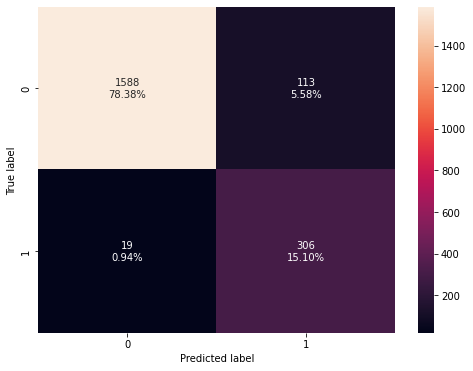

In [134]:
cm_sklearn(abc_tuned1, X_test, Y_test)

##Randomized Search CV

In [135]:
%%time

# define model
model = AdaBoostClassifier(random_state=1)

# parameter grid to pass in GridSearchCV
param_grid={
            'class__base_estimator':[
                DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)
            ],
            'class__n_estimators': np.arange(10,110,10),
            'class__learning_rate':np.arange(0.1,2,0.1)
            }

# Type of scoring
scorer = metrics.make_scorer(metrics.recall_score)

sm = RandomUnderSampler()

pipeline = Pipeline([('sampling', sm), ('class', model)])

# Call RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1, n_jobs= -1)

#Fit parameters in RandomizedSearchCV
abc_tuned2.fit(X_temp, Y_temp)

print('Best parameters are {} with CV score {}:'.format(abc_tuned2.best_params_, abc_tuned2.best_score_))

Best parameters are {'class__n_estimators': 50, 'class__learning_rate': 0.6, 'class__base_estimator': DecisionTreeClassifier(max_depth=2)} with CV score 0.9339493073975834:
CPU times: user 990 ms, sys: 84.3 ms, total: 1.07 s
Wall time: 15.5 s


In [136]:
# build model with best parameters
abc_tuned2 = XGBClassifier(
    random_state=1, learning_rate=0.6, n_estimators= 50, max_depth=2
    )

X_train_over, Y_train_over = sm.fit_resample(X_temp, Y_temp)

# Fit model on train data
abc_tuned2.fit(X_train_over, Y_train_over)

XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=50, random_state=1)

In [137]:
# Calulate metrics on validation set
abc_random_val = model_perf_class_sklearn(abc_tuned2, X_test, Y_test)
print('Test Performance:')
abc_random_val

Test Performance:


Accuracy  Recall  Precisiion    F1
0     0.929   0.945       0.709 0.810

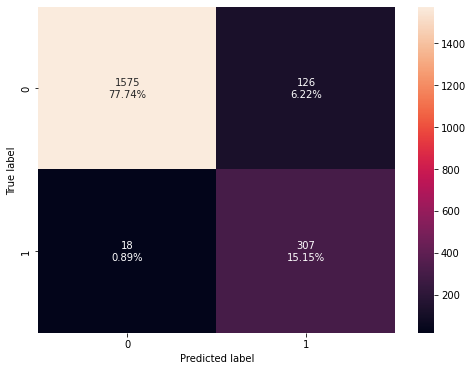

In [138]:
cm_sklearn(abc_tuned2, X_test, Y_test)

- The Recall performance is a little better after Random Search but still not as high as the recall we achieved with Gradient Boost's Randomized Search.
- Let's compare all of the model tuning results in order to see which has the best performance overall.

In [149]:
models_test_comp_df = pd.concat(
    [xgboost_grid_val.T, xgboost_random_val.T, gbc_grid_val.T, gbc_random_val.T, abc_grid_val.T, abc_random_val.T],
    axis=1
)

models_test_comp_df.columns = [
    'XGBoost GridSearch CV',
    'XGBoost RandomizedSearch CV',
    'GradientBoost GridSearch CV',
    'GradientBoost RandomizedSearch CV',
    'AdaBoost GridSearch CV',
    'AdaBoost RandomizedSearch CV']

print("Testing performance comparison:")

models_test_comp_df

Testing performance comparison:


XGBoost GridSearch CV  XGBoost RandomizedSearch CV  \
Accuracy                    0.922                        0.931   
Recall                      0.938                        0.945   
Precisiion                  0.688                        0.716   
F1                          0.794                        0.814   

            GradientBoost GridSearch CV  GradientBoost RandomizedSearch CV  \
Accuracy                          0.942                              0.945   
Recall                            0.951                              0.960   
Precisiion                        0.754                              0.759   
F1                                0.841                              0.848   

            AdaBoost GridSearch CV  AdaBoost RandomizedSearch CV  
Accuracy                     0.935                         0.929  
Recall                       0.942                         0.945  
Precisiion                   0.730                         0.709  
F1                           0.823                         0.810

- Gradient Boost Randomized Search CV is the clear winner as it has the highest metrics, not just for recall, but every single one of it's metrics are higher than any other the other models. 
- gbc_tuned2 will definitely be our final model choice as it gives the best recall and overall performance.

###Let's take a look at feature importance

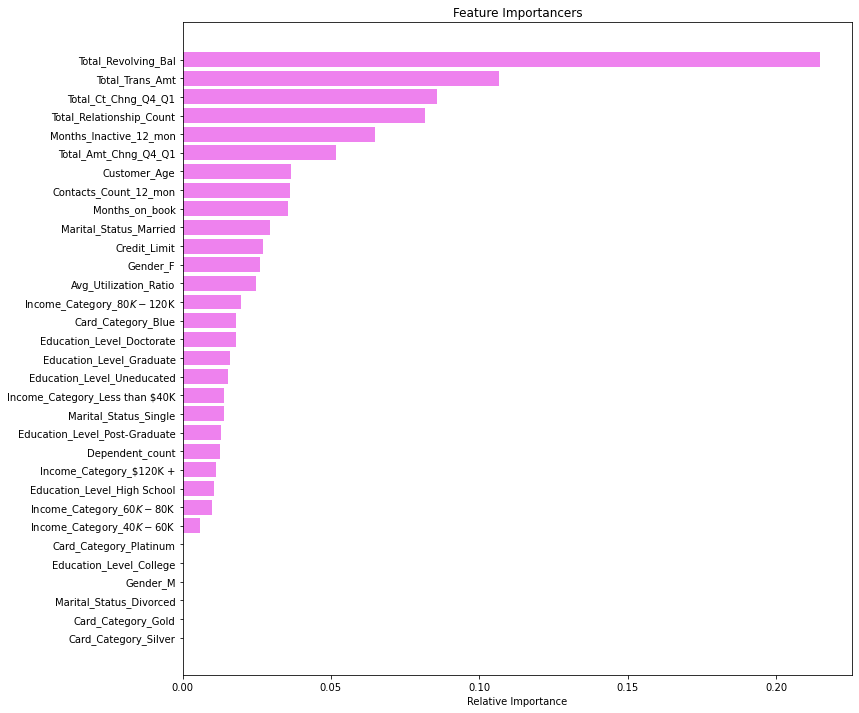

In [151]:
feature_names = X.columns
importances = gbc_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importancers')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- We can see from our final model that Total Revolving Balance is the most important feature. We saw earlier in our bivariate analysis that the majority of existing customers had a revolving balance of 800 and up, a customer below 
this threshold has a much higher chance of attriting.
- Total Transaction Amount is the 2nd most important feature which gives a lot of support to the theory that those using their card more would be less likely to attrite. This also goes hand in hand with Total Revolving Balance as those who have a higher Total Transaction amount are more likely to have a higher rotating balance.
- Total Count Change Q4 to Q1 is the 3rd most important feature which shows those making more purchases quarter to quarter are less likely to attrite as they use their card more.
- Total Relationship Count is also one of the top important features meaning that the more products a customer has with the bank the less likely they will attrite.
- Months Inactive during the last 12 months is important in showing that the longer acustomers card activity goes inactive the more likely they are to attrite as they are not using the card.

In [169]:
def myProcessingSteps(df):

    # Replacing the values in Income_Category

    df['Income_Category'].replace({'abc': 'Less than 40K'}, inplace=True)

    # Dropping the columns that are not required
    df.drop(
        columns=['Avg_Open_To_Buy', 'Total_Trans_Ct', 'CLIENTNUM'],
        inplace=True,
        axis=1
    )

    return df

In [170]:
processing = FunctionTransformer(myProcessingSteps)

In [171]:
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder

# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio"
]

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
  
# creating a list of categorical variables
categorical_features = [
    "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"
    ]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

model = Pipeline(
    steps=[
        ('CT', processing),
        ('pre', preprocessor),
        ('class balance', RandomUnderSampler()),
        ('GBC', GradientBoostingClassifier(random_state=1, subsample=0.8, n_estimators=250, max_features=0.9)
        )
    ]
)

In [172]:
# Separating Target variable for other variables
X = churn.drop('Attrition_Flag', axis=1)
y = churn['Attrition_Flag']

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

print(X_train.shape, X_test.shape)

(8101, 20) (2026, 20)


In [174]:
# fit model on training data
model.fit(X_train, Y_train)

Pipeline(steps=[('CT',
                 FunctionTransformer(func=<function myProcessingSteps at 0x7f09ec74f9e0>)),
                ('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mo...
                                                   'Avg_Utilization_Ratio']),
                                              

In [175]:
# calculate metrics
gradientboost_pipeline = model_perf_class_sklearn(model, X_test, Y_test)
print('Test Performance:')
gradientboost_pipeline

Test Performance:


Accuracy  Recall  Precisiion    F1
0     0.942   0.957       0.751 0.842

#Business Recommendations & Insights

- One of the top things that stood out throughout the EDA and then supported by the important features was that the more a customer used their credit card, the more likely they would remain an existing credit card customer.
- The most important feature being Total Revolving Balance. If you can get customers to purchase more with their credit cards in order to obtain a higher revolving balance then they will be less likely to attrite.
- Total Transaction Amount was the 2nd most important just reinforcing the idea that customers who spend more with their credit card are more likely not to attrite.
- Total Count of transaction from Q4 to Q1 also reinforces the more a customer uses their card the better for keeping them as an existing customer.
- Given the feature importance, I would reccomend Thera bank look to create or expand a reward system such as 2% cash back or discounts at select retailers in order to encourage customers to use their cards more creating a higher Total Transaction Amount and in turn a higher Total Revolving Balance in order to increase the odds of keeping them as an existing customer while also earning more interest off of the higher balances.
- Total Relationship Count is the 4th most important feature implying that the more products with the bank a customer has in addition to their credit card, the more likely they will remain an existing credit card customer.
- Then the 5th most important feature was Months Inactive in the last 12 months, which also shows the less a customer uses their card, the greater the chance they will attrite.
- The bank could monitor for when a customer has been inactive with their credit card for a couple months and contact them with a special offer of perhaps no interest for 6 months on your next purchase in order to persuade them to use their card again or perhaps offer additional cash back or rewards aimed at that customer and their spending habits. This would hopefully encourage them to start using their card again because the longer they're inactive the greater the chances of attrition.
- So in summation Thera bank should work on promoting the increased use of their credit cards by existing customers so that they accumulate a greater total amount from their transaction and as a result a greater revolving balance. A points or rewards program of some sort may be a good way to achieve this. Thera bank should also extend offers for its additional banking products to current card holders in order to increase the total relationship count with customers and help to keep them as existing customers. They will also want to keep an eye on those customers who are inactive for too long and contact them in order to encourage them to use their card again. Perhaps a special offer tailored towards them would convince them. If Thera bank focuses on these primary features then I believe they will have a greater chance at reducing their attrition rate for credit card customers.
